In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
#phc = Phc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
!ls /hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_THETA_JAN_210x192x50_arctic

/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_THETA_JAN_210x192x50_arctic


In [5]:
first_spinup = StateRead()
first_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/')
first_spinup.readData(range(270 + 72, 270 + 90,1))
first_spinup.baroCalc()
first_spinup.fluxCalc()
first_spinup.mxldepthread(range(12))
first_spinup.seaiceread(range(12))
first_spinup.title('ERA run')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/


In [6]:
first_sponge = StateRead()
first_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/')
first_sponge.readData(range(1080-18,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.mxldepthread(range(12))
first_sponge.seaiceread(range(12))
first_sponge.title('ERA with scaled BC')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/


In [7]:
timescale_1year = StateRead()
timescale_1year.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/')
timescale_1year.readData(range(1080-18,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
#timescale_1year.mxldpethread(range(12))
#timescale_1year.seaiceread(range(12))
timescale_1year.title('1y Sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/


In [8]:
nonscaled_obcs = StateRead()
nonscaled_obcs.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/')
nonscaled_obcs.readData(range(1080-18,1080,1))
nonscaled_obcs.baroCalc()
nonscaled_obcs.mxldepthread(range(12))
nonscaled_obcs.seaiceread(range(12))
nonscaled_obcs.fluxCalc()
nonscaled_obcs.title('ERA with non scaled BC')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/


In [9]:
noseaice_run = StateRead()
noseaice_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/')
noseaice_run.readData(range(1080-18,1080,1))
noseaice_run.baroCalc()
noseaice_run.mxldepthread(range(12))
noseaice_run.fluxCalc()
noseaice_run.title('Noseaice')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/


In [10]:
short_timescale_run = StateRead()
short_timescale_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/')
short_timescale_run.readData(range(1080-18,1080,1))
short_timescale_run.baroCalc()
short_timescale_run.mxldepthread(range(12))
short_timescale_run.fluxCalc()
short_timescale_run.title('5d timescale')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/


In [11]:
short_timescale_low_visc_run = StateRead()
short_timescale_low_visc_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/')
short_timescale_low_visc_run.readData(range(1080-18,1080,1))
short_timescale_low_visc_run.baroCalc()
short_timescale_low_visc_run.mxldepthread(range(12))
short_timescale_low_visc_run.fluxCalc()
short_timescale_low_visc_run.title('low visc + 5d tsc')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/


In [12]:
low_visc_run = StateRead()
low_visc_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/')
low_visc_run.readData(range(1080-18,1080,1))
low_visc_run.baroCalc()
low_visc_run.mxldepthread(range(12))
low_visc_run.fluxCalc()
low_visc_run.title('Low viscosity')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/


In [13]:
nonscale_18_run = StateRead()
nonscale_18_run.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/')
nonscale_18_run.readData(range(218-18,218,1))
nonscale_18_run.baroCalc()
nonscale_18_run.mxldepthread(range(12))
nonscale_18_run.fluxCalc()
nonscale_18_run.title('Nonscale 18')

Data read from /hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/


In [14]:
scaled_18_run = StateRead()
scaled_18_run.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/')
scaled_18_run.readData(range(218-18,218,1))
scaled_18_run.baroCalc()
scaled_18_run.mxldepthread(range(12))
scaled_18_run.fluxCalc()
scaled_18_run.title('Scaled obcs 18')

Data read from /hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/


In [15]:
CORE_sponge = StateRead()
CORE_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/')
CORE_sponge.readData(range(1080-18,1080,1))
CORE_sponge.baroCalc()
CORE_sponge.mxldepthread(range(12))
CORE_sponge.seaiceread(range(12))
CORE_sponge.fluxCalc()
CORE_sponge.title('CORE run')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/


In [16]:
CORE_nosponge = StateRead()
CORE_nosponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/')
CORE_nosponge.readData(range(1080-18,1080,1))
CORE_nosponge.baroCalc()
CORE_nosponge.mxldepthread(range(12))
CORE_nosponge.seaiceread(range(12))
CORE_nosponge.fluxCalc()
CORE_nosponge.title('co nosp')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/


In [17]:
CORE_lwvi = StateRead()
CORE_lwvi.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/')
CORE_lwvi.readData(range(1080-18,1080,1))
CORE_lwvi.baroCalc()
CORE_lwvi.mxldepthread(range(12))
CORE_lwvi.seaiceread(range(12))
CORE_lwvi.fluxCalc()
CORE_lwvi.title('co lwv')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/


In [18]:
CORE_gmhalf = StateRead()
CORE_gmhalf.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_gmhalf/results/')
CORE_gmhalf.readData(range(1080-18,1080,1))
CORE_gmhalf.baroCalc()
CORE_gmhalf.mxldepthread(range(12))
#CORE_gmhalf.seaiceread(range(12))
CORE_gmhalf.fluxCalc()
CORE_gmhalf.title('co gmh')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_gmhalf/results/


In [19]:
CORE_spinup = StateRead()
CORE_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/')
CORE_spinup.readData(range(720-12,720,1))
CORE_spinup.baroCalc()
#CORE_gmhalf.mxldepthread(range(12))
#CORE_gmhalf.seaiceread(range(12))
CORE_spinup.fluxCalc()
CORE_spinup.title('spinup')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/


In [20]:
def lit_data():
    liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Fram1' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Fram2' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6},
             'Davis2': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6},
             'Davis1': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }
    core2 =  {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
              'Fram1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
              'Fram2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
             'Barents' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Barents1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Barents2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' : 0.99} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75},
             'Davis2': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75},
             'Davis1': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75}
            }
    obs =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Fram1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Fram2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2'} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'},
             'Davis2': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'},
             'Davis1': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'}
            }
    return liq10,core2,obs

In [21]:
liq10,core2,obs = lit_data();
for var in ['Barents1','Bering','Fram','Fram1','Fram2','Davis','Davis2']:
    print var
    print 'first ',first_spinup.totalFluxes[var]
    print 'spong ',first_sponge.totalFluxes[var]
    print 'noscal',nonscaled_obcs.totalFluxes[var]
    print 'COR_sp',CORE_sponge.totalFluxes[var]
    print 'COR_ns',CORE_nosponge.totalFluxes[var]
    print 'COR_lv',CORE_lwvi.totalFluxes[var]
    print 'COR_gm',CORE_gmhalf.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents1
first  {'Outflow': -0.78, 'Total flow': -0.11, 'Inflow': 0.67}
spong  {'Outflow': -0.73, 'Total flow': -0.0, 'Inflow': 0.72}
noscal {'Outflow': -1.15, 'Total flow': -0.63, 'Inflow': 0.52}
COR_sp {'Outflow': -3.41, 'Total flow': -0.34, 'Inflow': 3.07}
COR_ns {'Outflow': -3.37, 'Total flow': -0.55, 'Inflow': 2.83}
COR_lv {'Outflow': -4.25, 'Total flow': -0.55, 'Inflow': 3.7}
COR_gm {'Outflow': -3.42, 'Total flow': -0.38, 'Inflow': 3.04}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
first  {'Outflow': -0.03, 'Total flow': 1.23, 'Inflow': 1.26}
spong  {'Outflow': -0.02, 'Total flow': 1.23, 'Inflow': 1.25}
noscal {'Outflow': -0.03, 'Total flow': 1.23, 'Inflow': 1.25}
COR_sp {'Outflow': -0.09, 'Total flow': 1.25, 'Inflow': 1.34}
COR_ns {'Outflow': -0.09, 'Total flow': 1.25, 'Inflow': 1.34}
COR_lv {'Outflow': -0.11, 'Total flow': 1.25, 'Inflow': 

In [22]:
barents,fram,bering,davis,arctic1,arctic2,arctic3,arctic4 = arctic_reg()

In [23]:
comp_data = {'first_spinup' : first_spinup , 'first_sponge' : first_sponge , 'noseaice_run' : noseaice_run ,\
            'nonscaled_obcs' : nonscaled_obcs , 'Noaa' : Noaa , 'low_visc_run' : low_visc_run , \
            'short_timescale_run' : short_timescale_run , \
            'short_timescale_low_visc_run' : short_timescale_low_visc_run , 
            'nonscale_18_run' : nonscale_18_run , 'scaled_18_run' : scaled_18_run, 'CORE_sponge' : CORE_sponge,
            'CORE_nosponge' : CORE_nosponge}

In [24]:
comp_data = {0 : first_spinup , 1 : first_sponge , 2 : CORE_sponge , 3 : nonscaled_obcs , \
             4 : CORE_gmhalf , 5 : CORE_nosponge , 6 : short_timescale_low_visc_run ,
             7 : nonscale_18_run , 8 : woa}

In [25]:
comp_data1 = {0 : first_spinup , 1 : first_sponge , 2 : CORE_sponge , 3 : nonscaled_obcs , \
             4 : CORE_gmhalf , 5 : CORE_nosponge , 6 : short_timescale_low_visc_run ,
             7 : nonscale_18_run , 8 : woa}

In [26]:
comp_pm = {0 : woa , 1 : nonscaled_obcs ,2 : first_sponge ,  3 : CORE_sponge ,  4 : CORE_spinup }

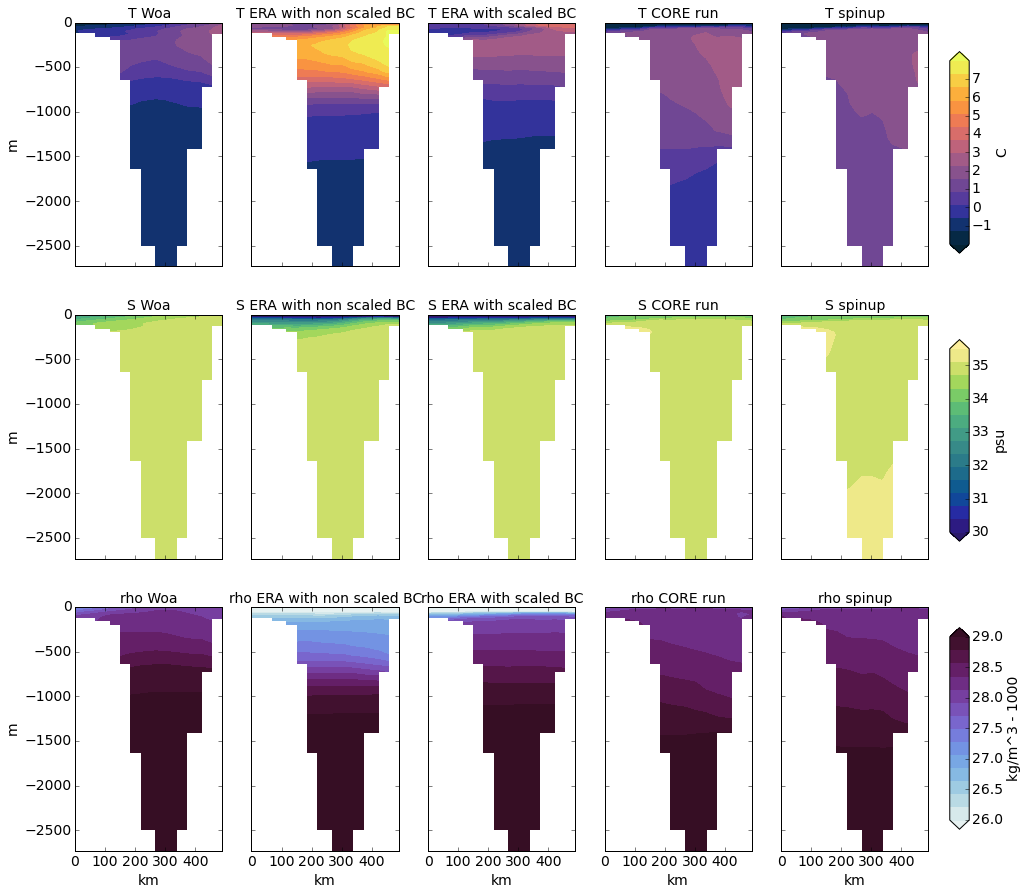

In [27]:
comp_plot(comp_pm,fram)

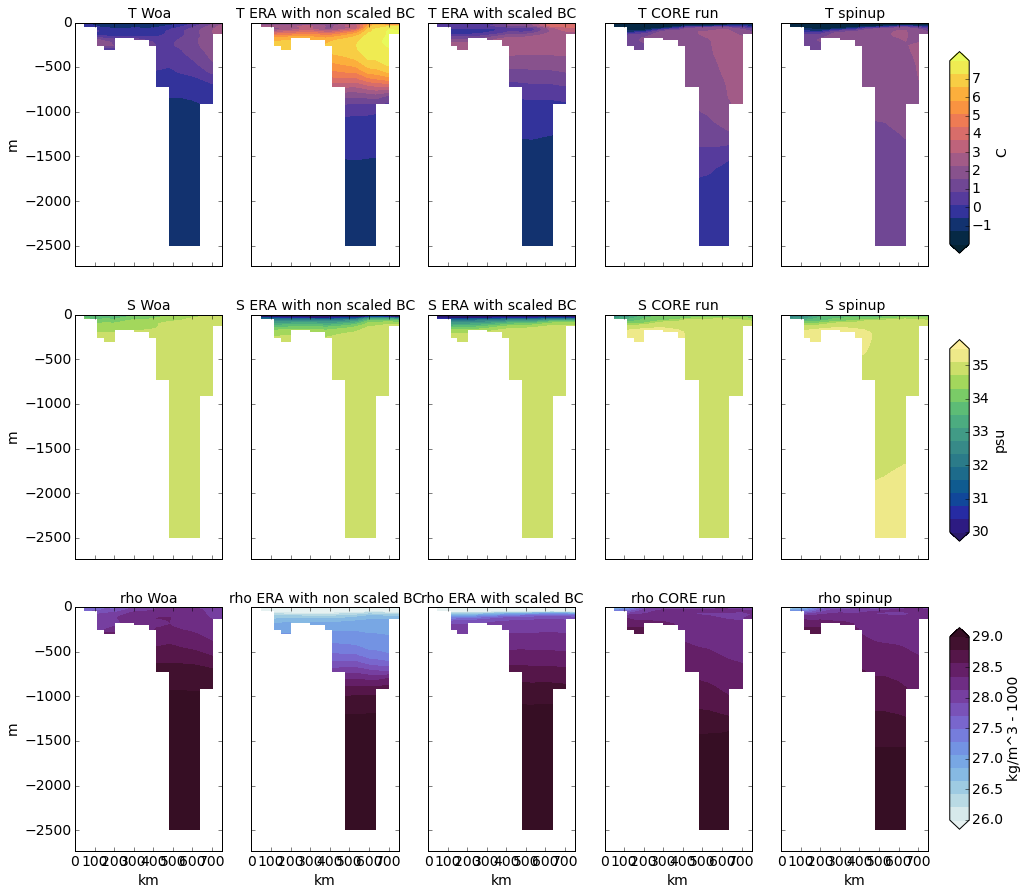

In [28]:
comp_plot(comp_pm,barents)

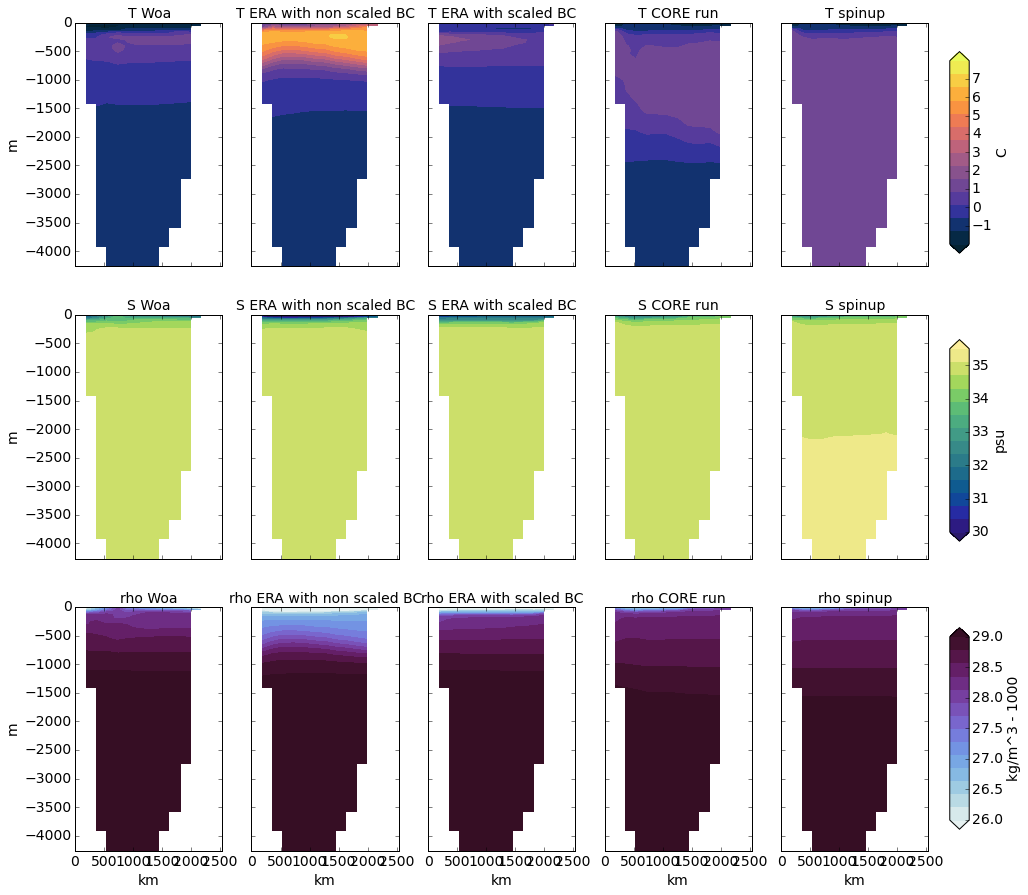

In [29]:
comp_plot(comp_pm,arctic1)

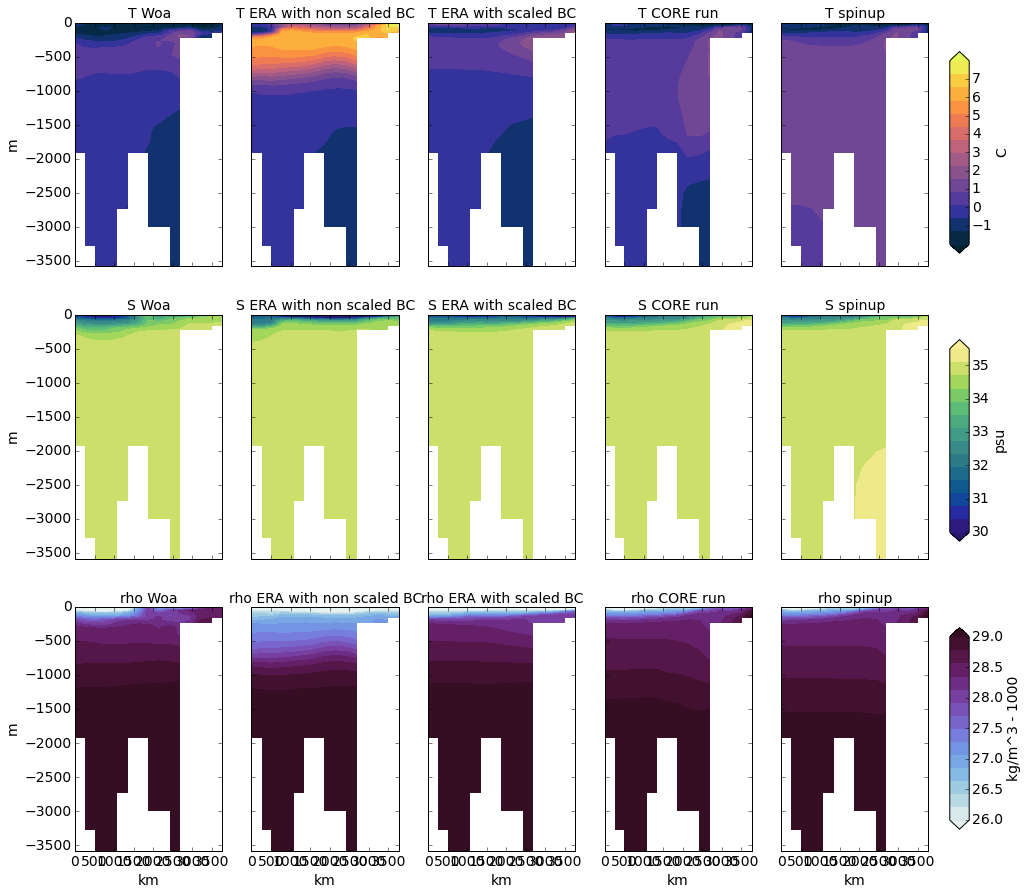

In [30]:
comp_plot(comp_pm,arctic2)

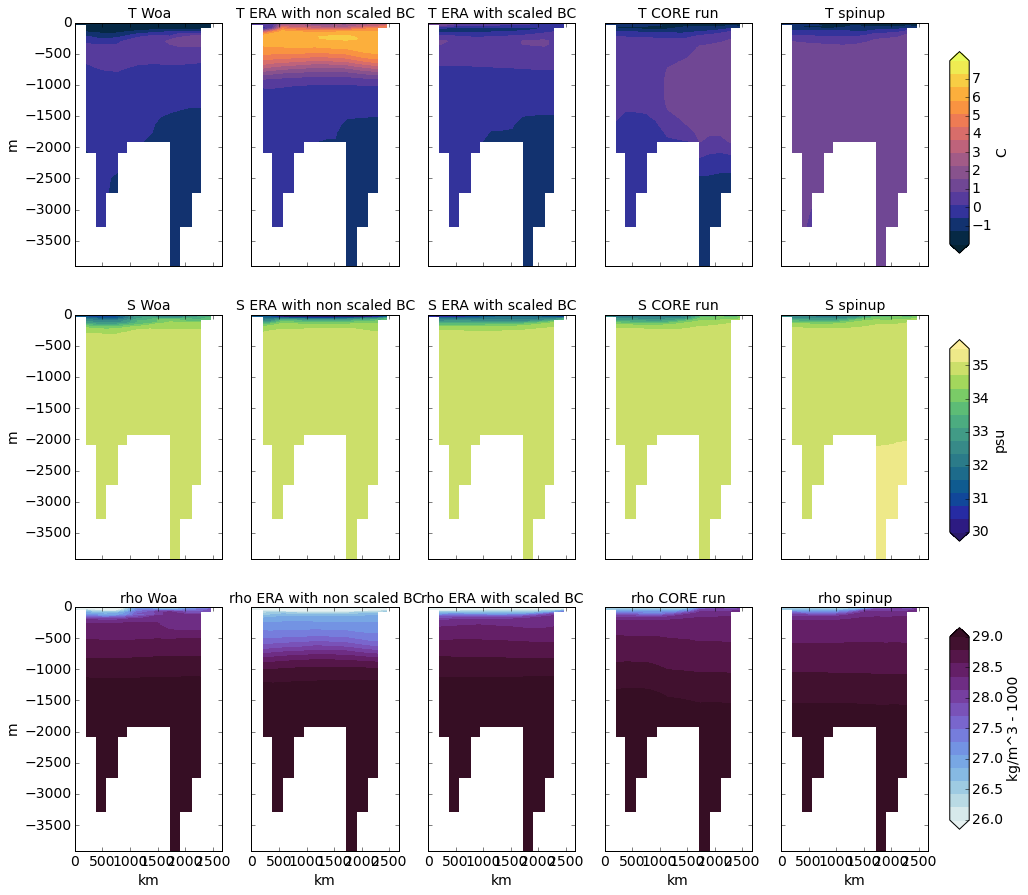

In [31]:
comp_plot(comp_pm,arctic3)

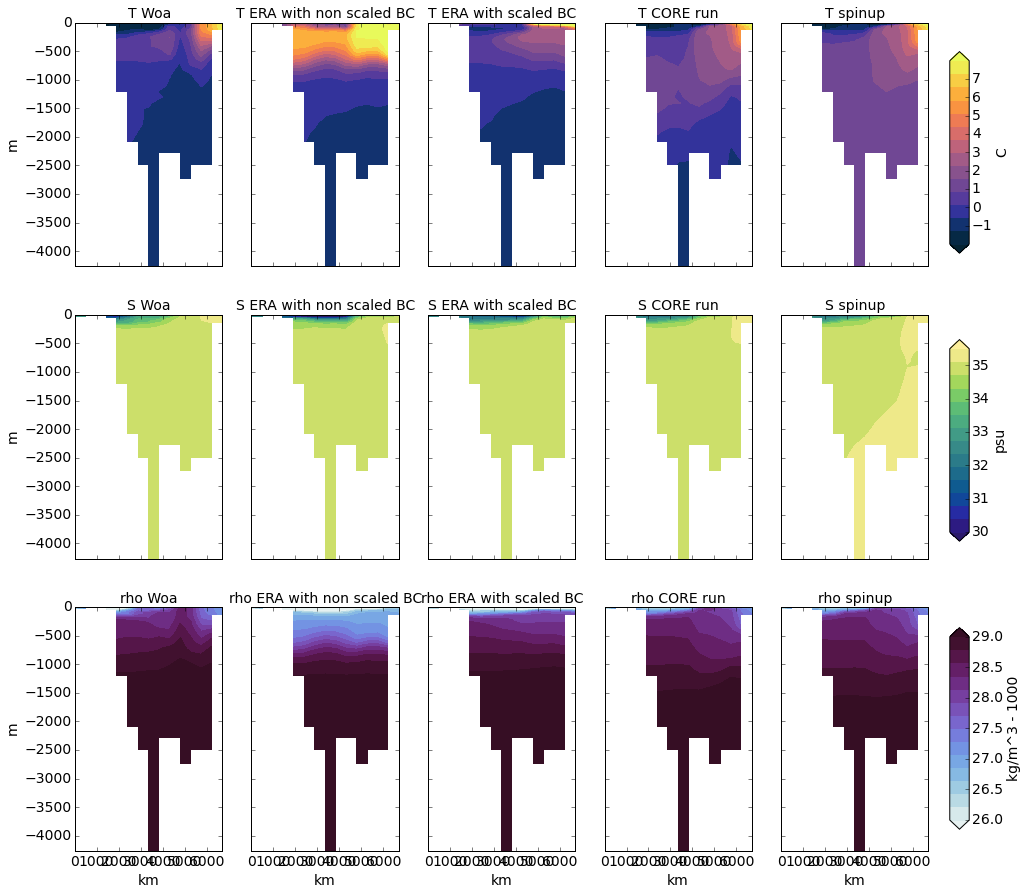

In [32]:
comp_plot(comp_pm,arctic4)

In [33]:
def plot_psi_arrow_tot(comp_data1):
    fig,axes = plt.subplots(3,3)
    vimin = -20
    vimax = 20
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp_data1[ind].title)
        masked_array = np.ma.array(comp_data1[ind].psi_ave[:,:], mask=np.isnan(comp_data1[ind].psi_ave[:,:]))
        cmap= matplotlib.cm.seismic
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if comp_data1[ind].res == 36:
            kk = 1
        elif comp_data1[ind].res == 18:
            kk = 2
        for x in range(len(comp_data1[ind].X)-1,1,-5*kk):
            for y in range(len(comp_data1[ind].Y)-1,1,-5*kk):
                ax.arrow(comp_data1[ind].X[x],comp_data1[ind].Y[y],comp_data1[ind].Uda[y,x]*80,comp_data1[ind].Vda[y,x]*80)
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
comp_data1 = {0 : first_spinup , 1 : first_sponge ,  2 : short_timescale_low_visc_run ,3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_sponge , 6 : CORE_nosponge ,
             7 : CORE_lwvi, 8 : CORE_gmhalf}

In [34]:
def plot_psi_arrow(data):
    fig,axes = plt.subplots(1,1)
    vimin = -20
    vimax = 20
    masked_array = np.ma.array(data.psi_ave[:,:], mask=np.isnan(data.psi_ave[:,:]))
    cmap= matplotlib.cm.seismic
    cmap.set_bad('grey',1.)
    if data.res == 36:
        kk = 1
    elif data.res == 18:
        kk = 2
    ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="left")
    for x in range(len(data.X)-1,1,-3*kk):
        for y in range(len(data.Y)-1,1,-3*kk):
            plt.arrow(data.X[x],data.Y[y],data.Uda[y,x]*60,data.Vda[y,x]*60)
    cbar = fig.colorbar(ca)
    fig.subplots_adjust(right=2.4,top=2.)

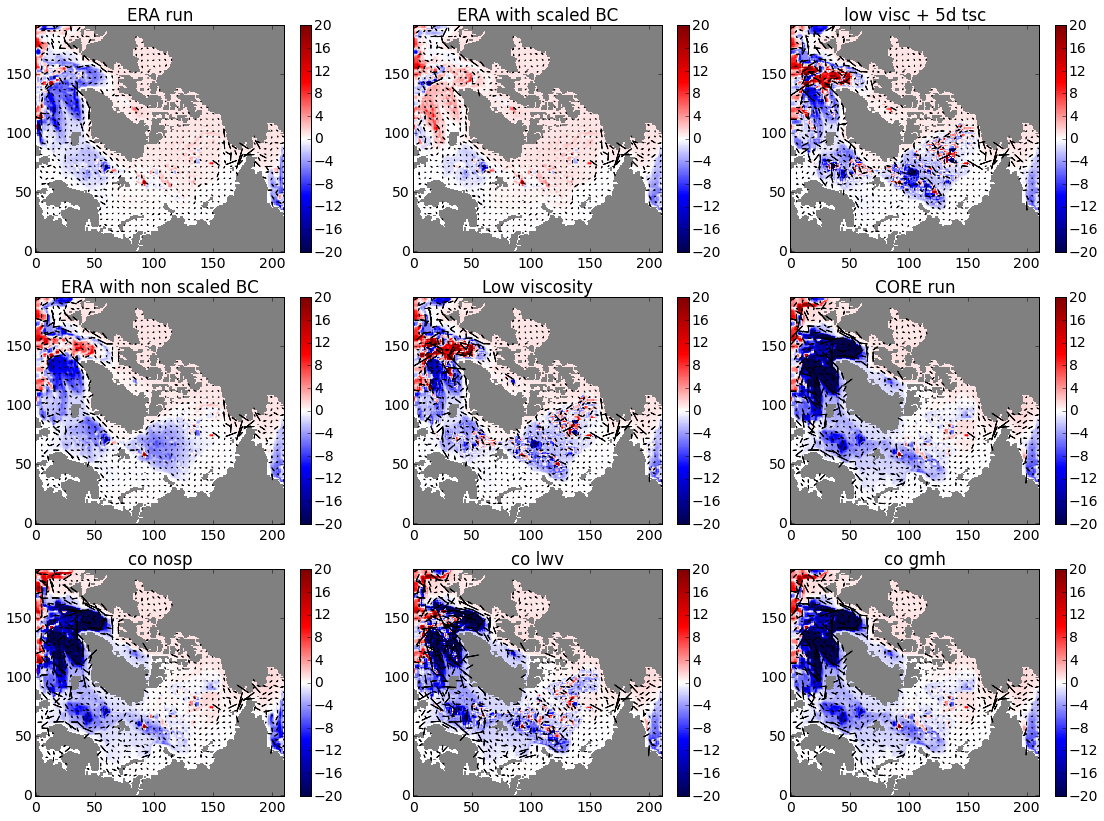

In [35]:
plot_psi_arrow_tot(comp_data1)

Average of the frist 55-60 years with no sponge on OBCS

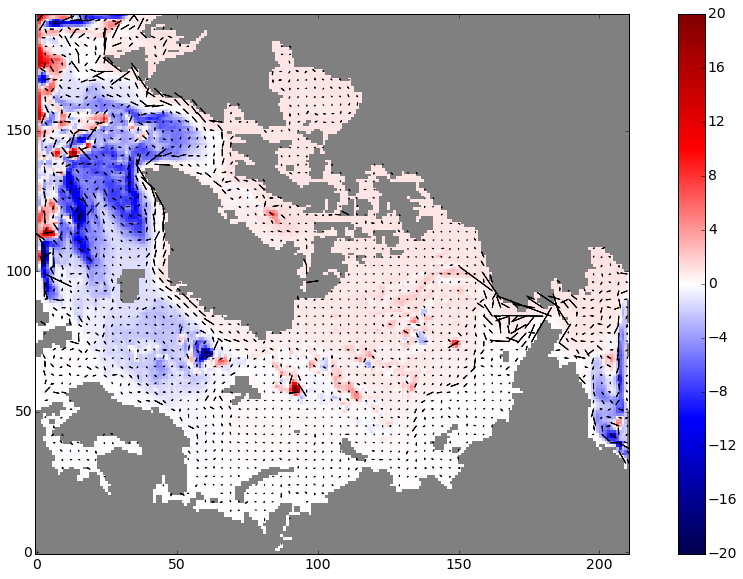

In [36]:
plot_psi_arrow(first_spinup)

Average of the frist 55-60 years with nonscaled obcs with sponge on OBCS

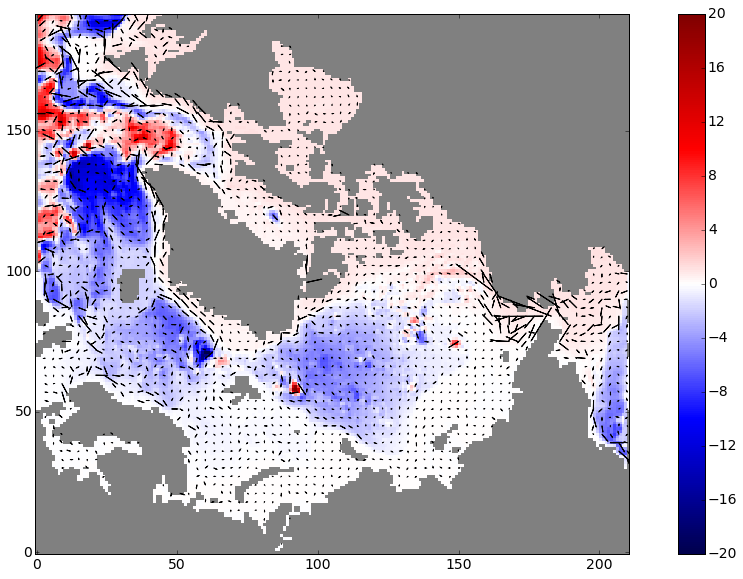

In [37]:
plot_psi_arrow(nonscaled_obcs)

Average of the frist 55-60 years with sponge 1 month timescale and scaled OBCS

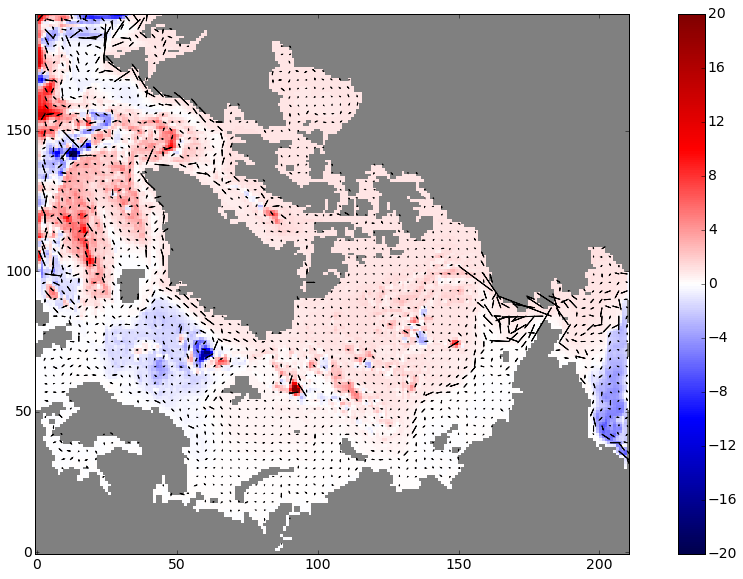

In [38]:
plot_psi_arrow(first_sponge)

Average of the frist 55-60 years with sponge 1 year timescale and scaled OBCS

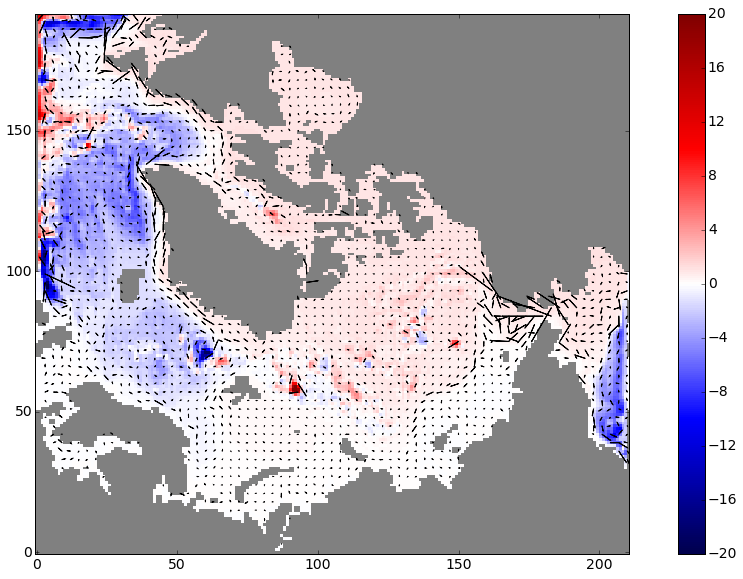

In [39]:
plot_psi_arrow(timescale_1year)

Average of the frist 55-60 years with no seaice

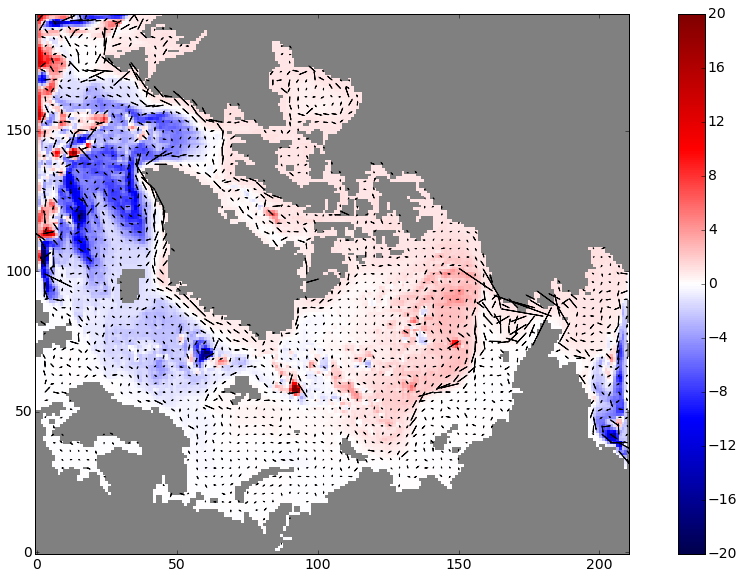

In [40]:
plot_psi_arrow(noseaice_run)

Average of the frist 55-60 years with low viscosity (0.5)

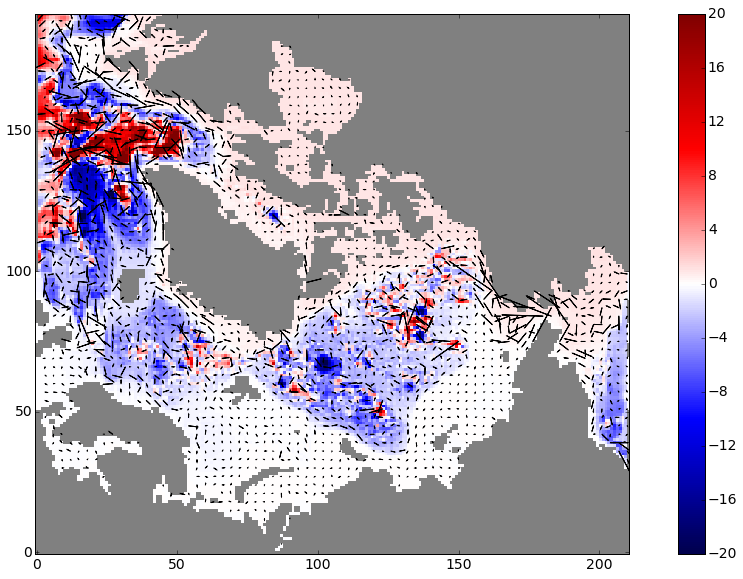

In [41]:
plot_psi_arrow(low_visc_run)

Average of the frist 55-60 years with 5 day sponge timescale

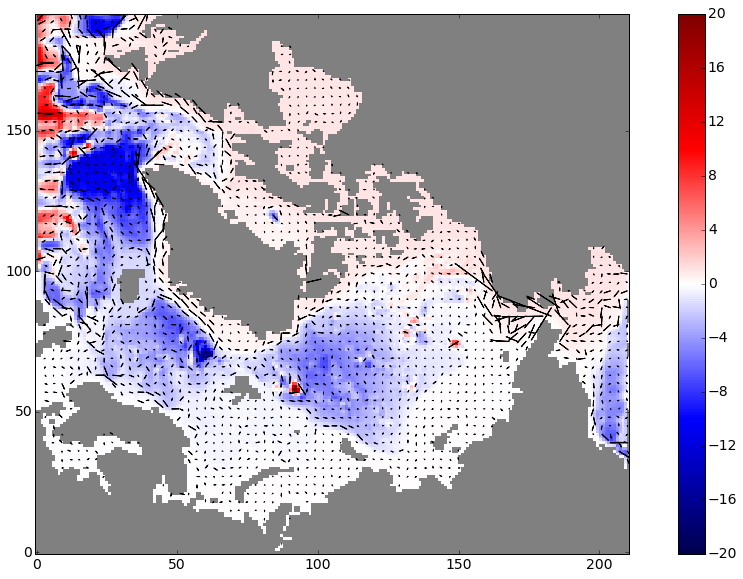

In [42]:
plot_psi_arrow(short_timescale_run)

Average of the frist 55-60 years with low viscosity and 5 days timescale

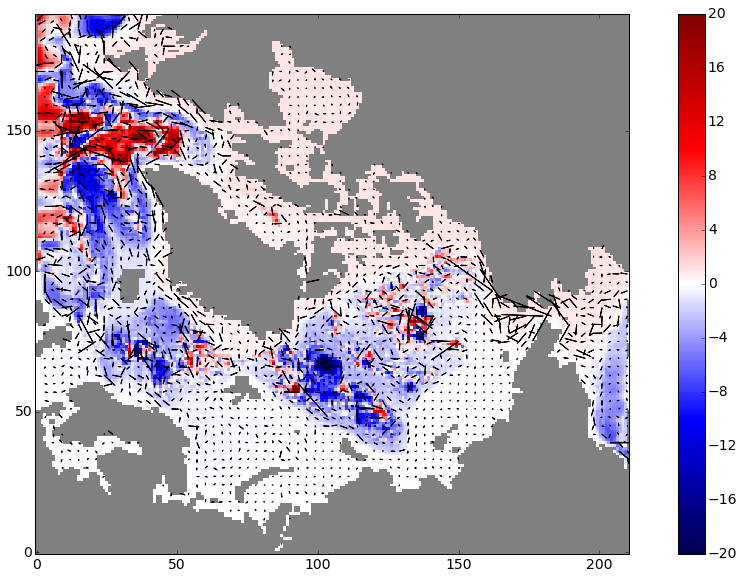

In [43]:
plot_psi_arrow(short_timescale_low_visc_run)

Average of the first 55-60 years with 18km model and no scale on obcs

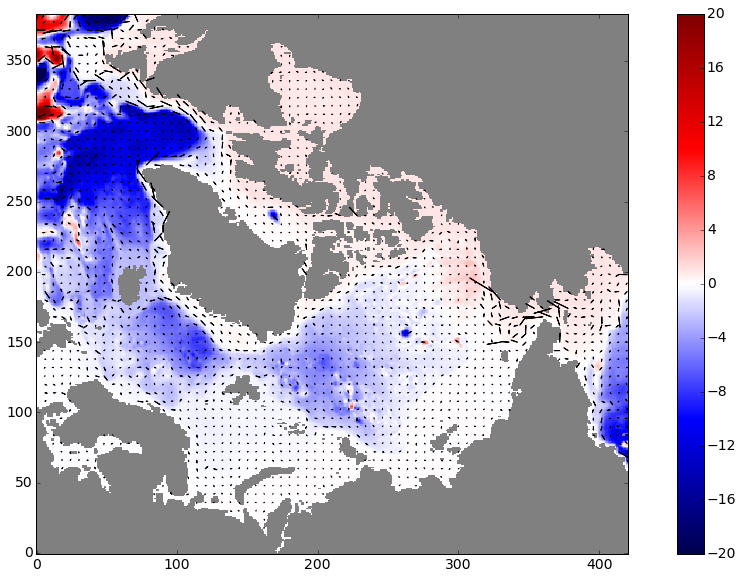

In [44]:
plot_psi_arrow(nonscale_18_run)

Average of the first 55-60 years with 18km model and scale on obcs

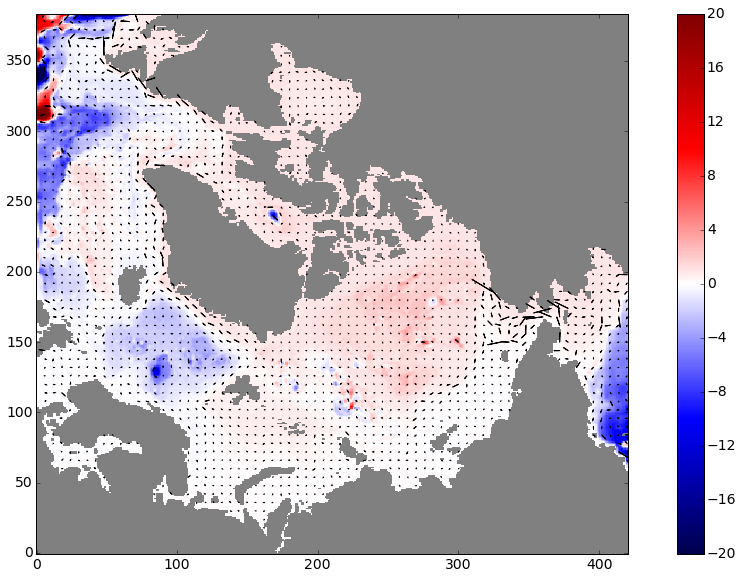

In [45]:
plot_psi_arrow(scaled_18_run)

Average of the first 55-60 years with CORE forcing sponge and no scaling on obcs

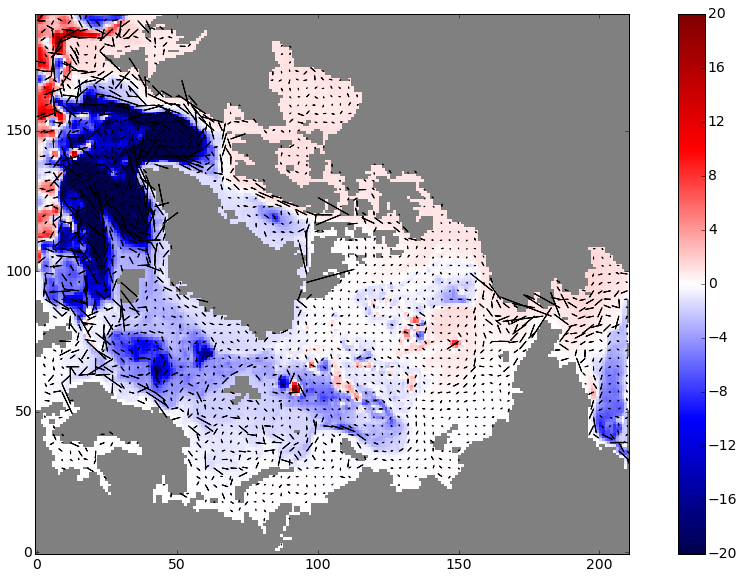

In [46]:
plot_psi_arrow(CORE_sponge)

Average of the first 55-60 years with CORE forcing no sponge and no scaling on obcs

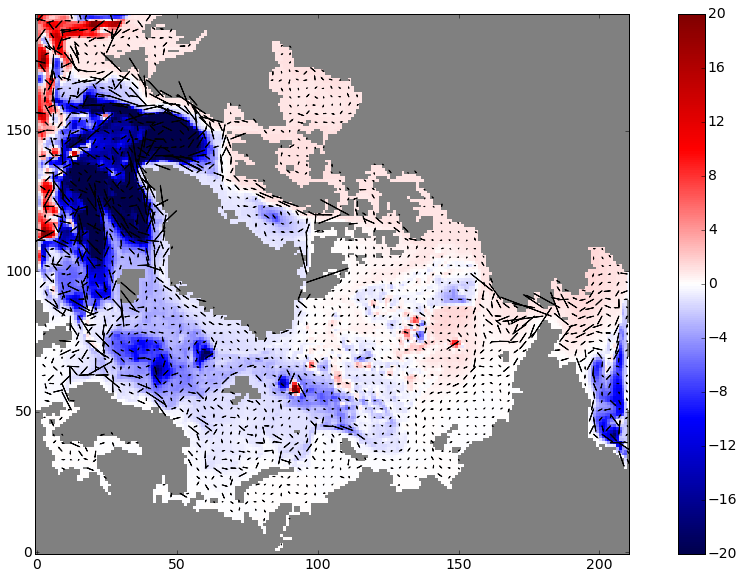

In [47]:
plot_psi_arrow(CORE_nosponge)

Average of the first 55-60 years with CORE forcing sponge and half GM parameter

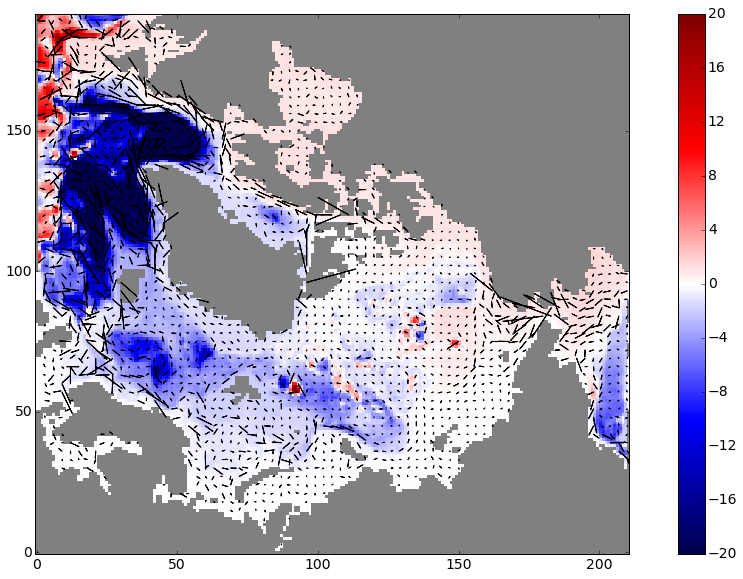

In [48]:
plot_psi_arrow(CORE_gmhalf)

Average of the first 55-60 years with CORE forcing sponge and low viscosity (0.5)

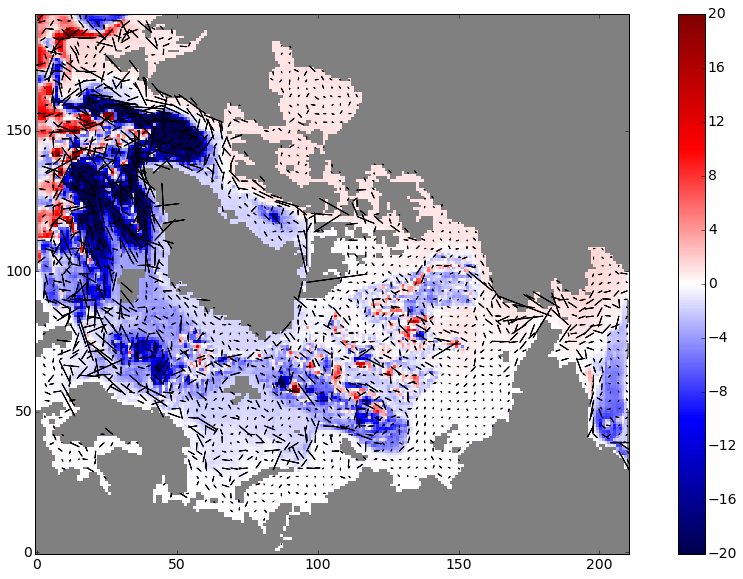

In [49]:
plot_psi_arrow(CORE_lwvi)

In [50]:
comp_data = {0 : first_spinup , 1 : first_sponge , 2 : nonscaled_obcs , 3 : CORE_sponge , \
             4 : CORE_gmhalf , 5 : CORE_nosponge , 6 : CORE_lwvi, 7 : woa}

Fram strait

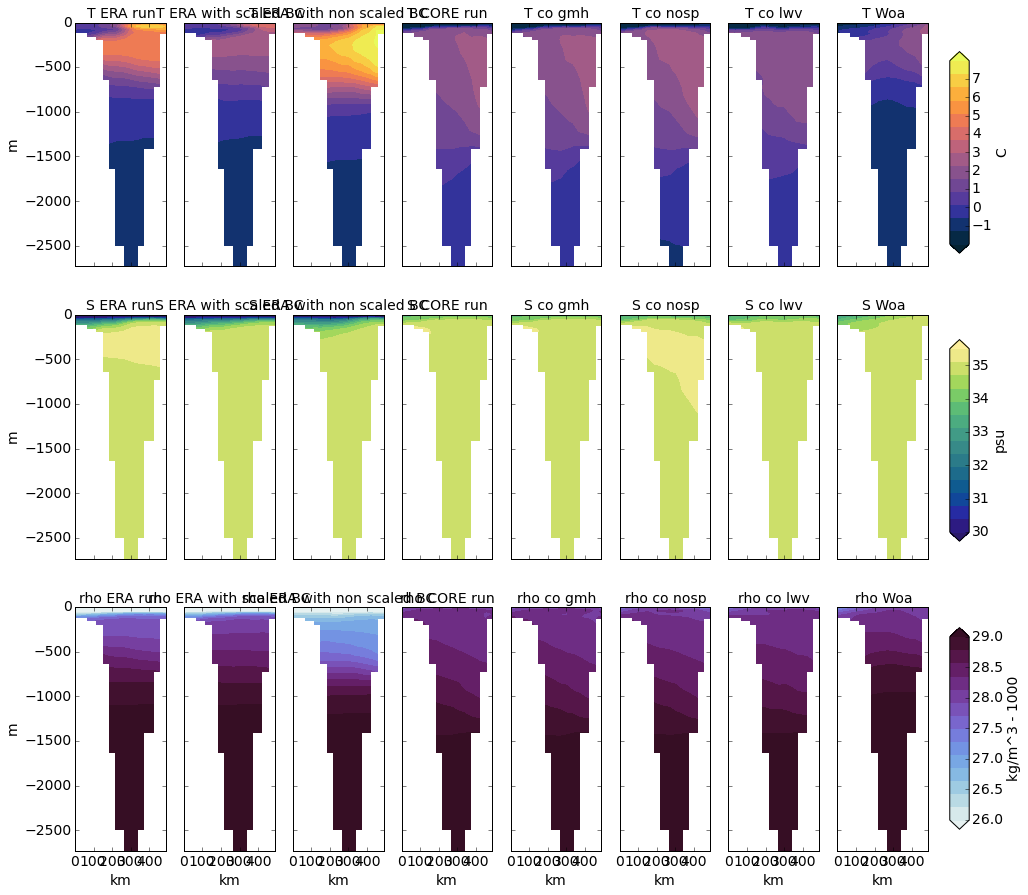

In [51]:
comp_plot(comp_data,fram)

Davis strait

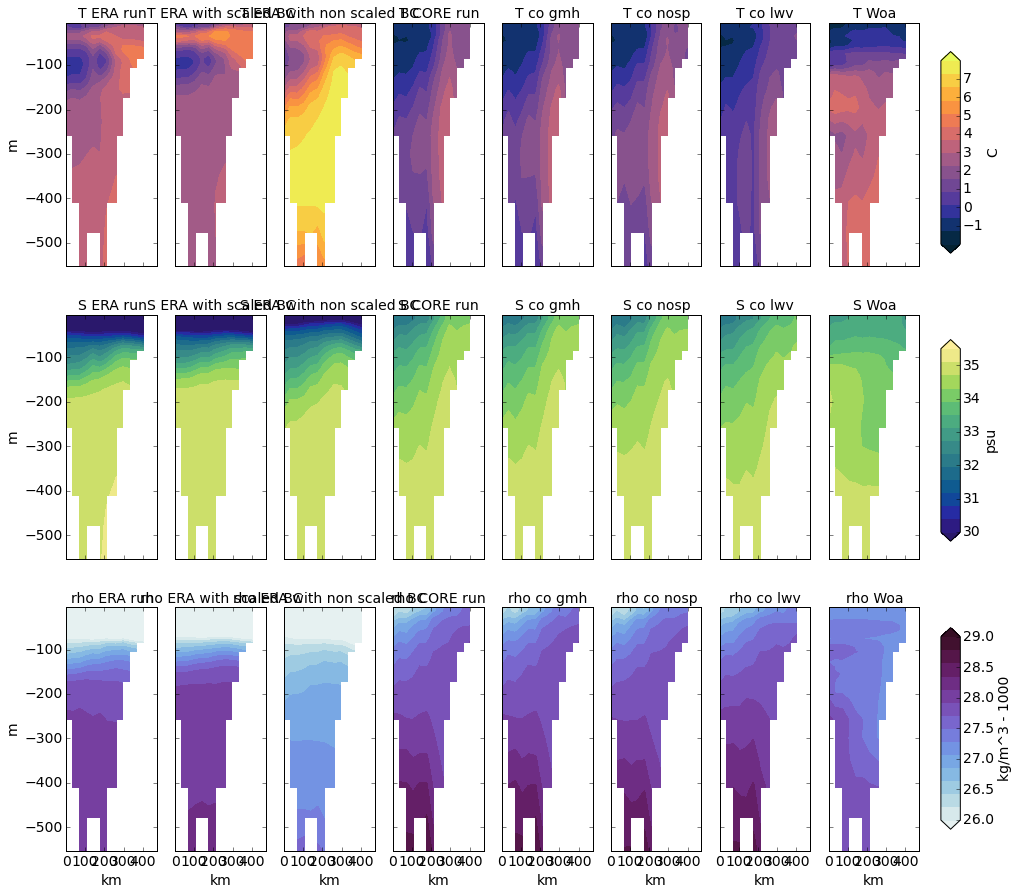

In [52]:
comp_plot(comp_data,davis)

Barents strait

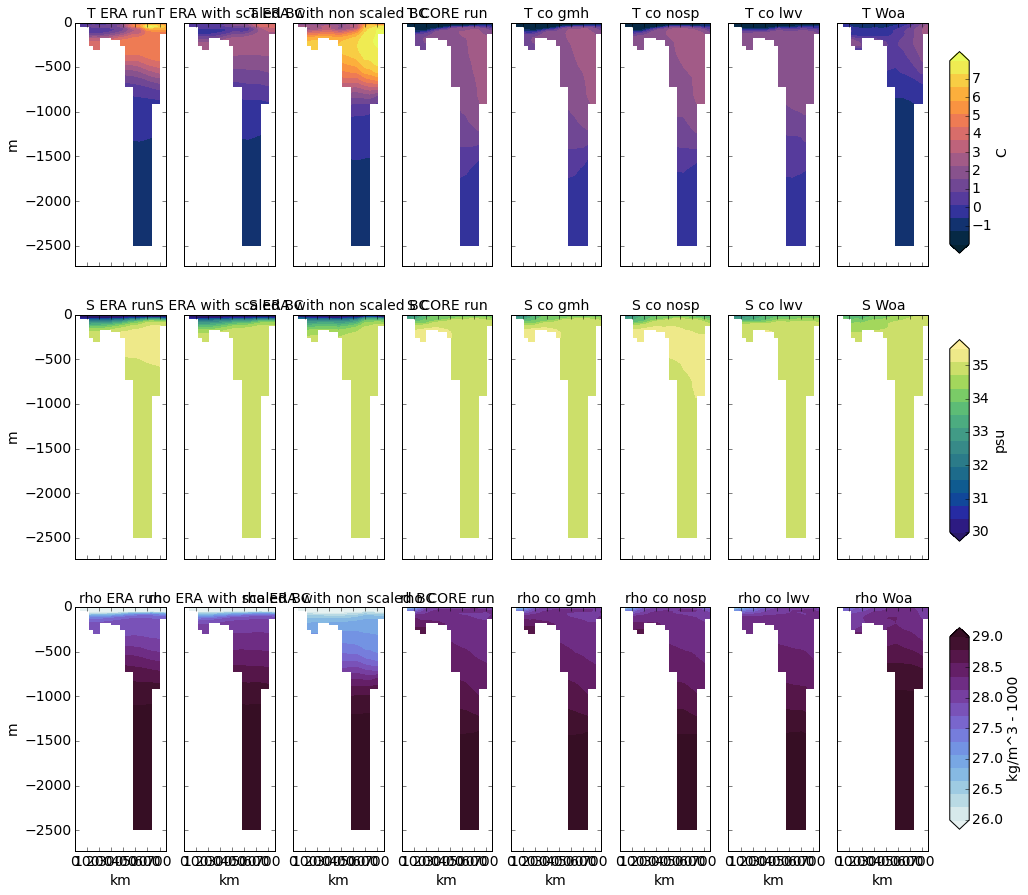

In [53]:
comp_plot(comp_data,barents)

Bering strait

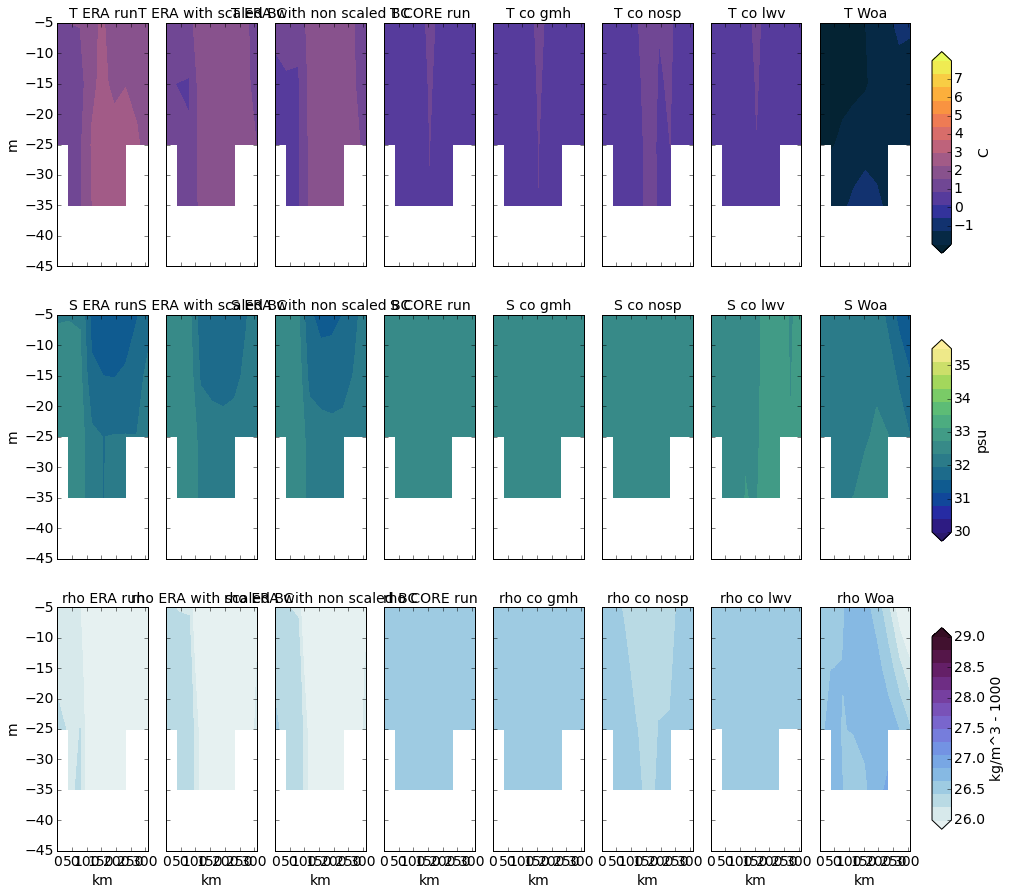

In [54]:
comp_plot(comp_data,bering)


Arctic 1

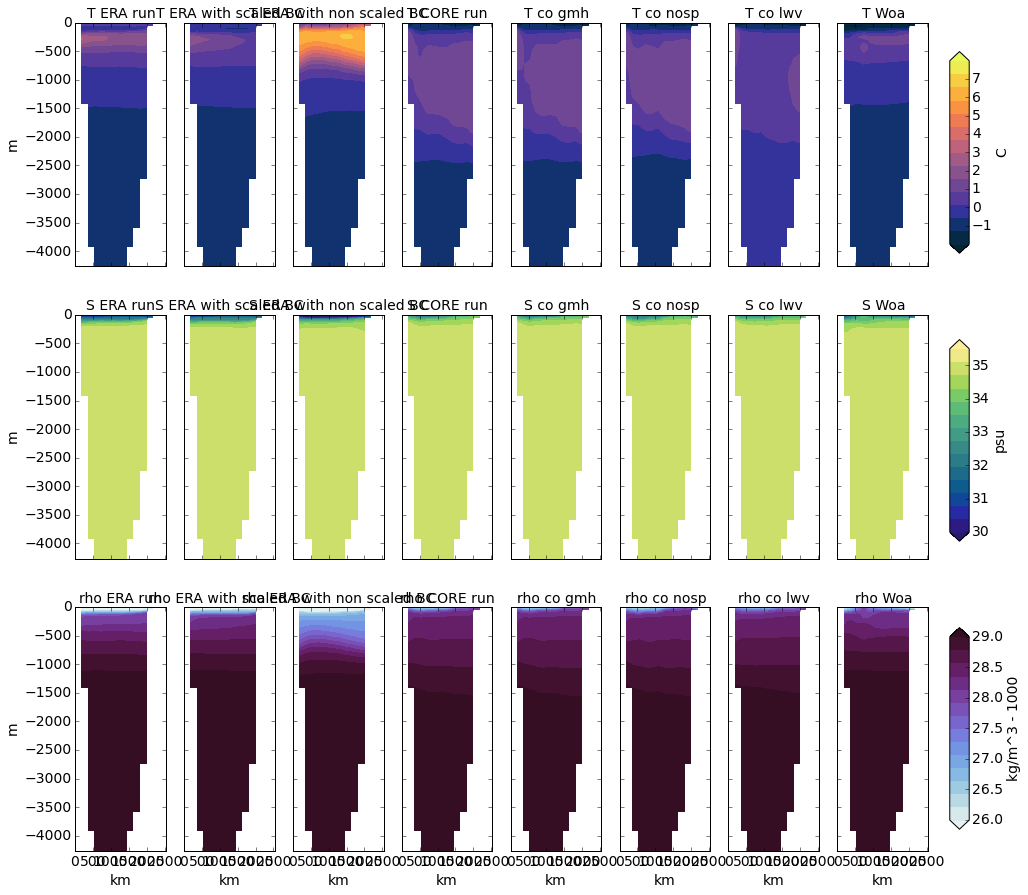

In [55]:
comp_plot(comp_data,arctic1)

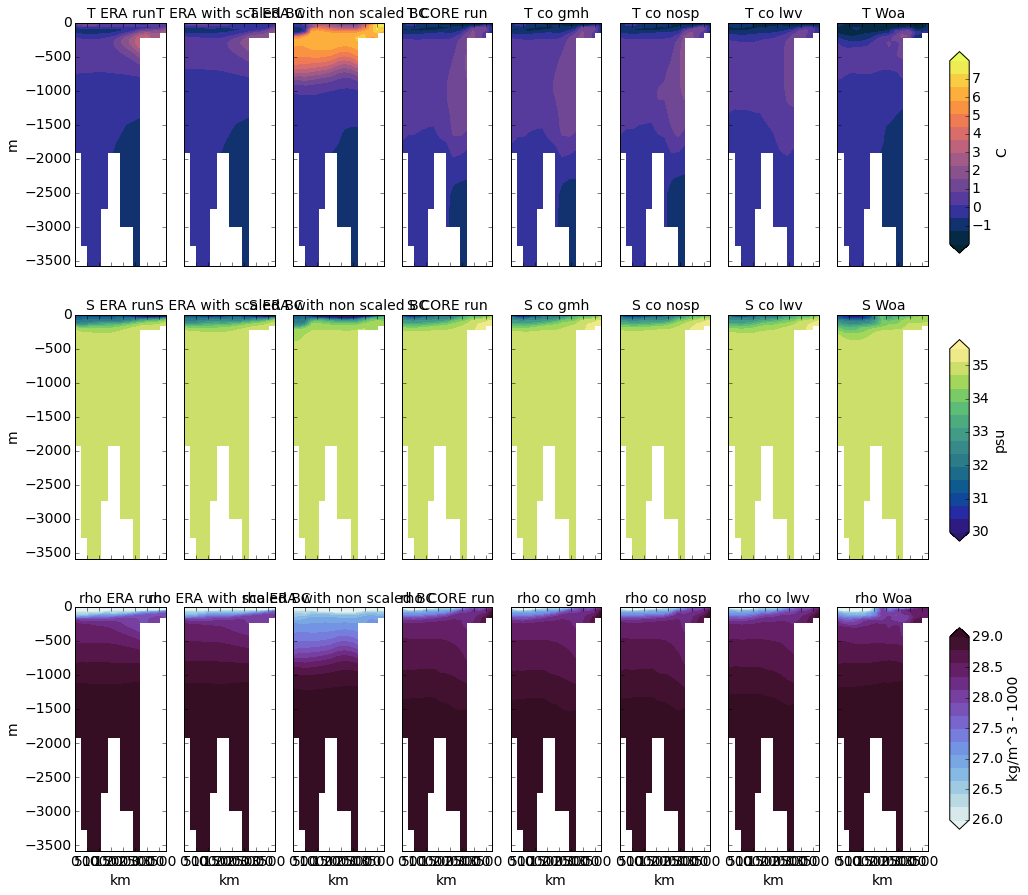

In [56]:
comp_plot(comp_data,arctic2)

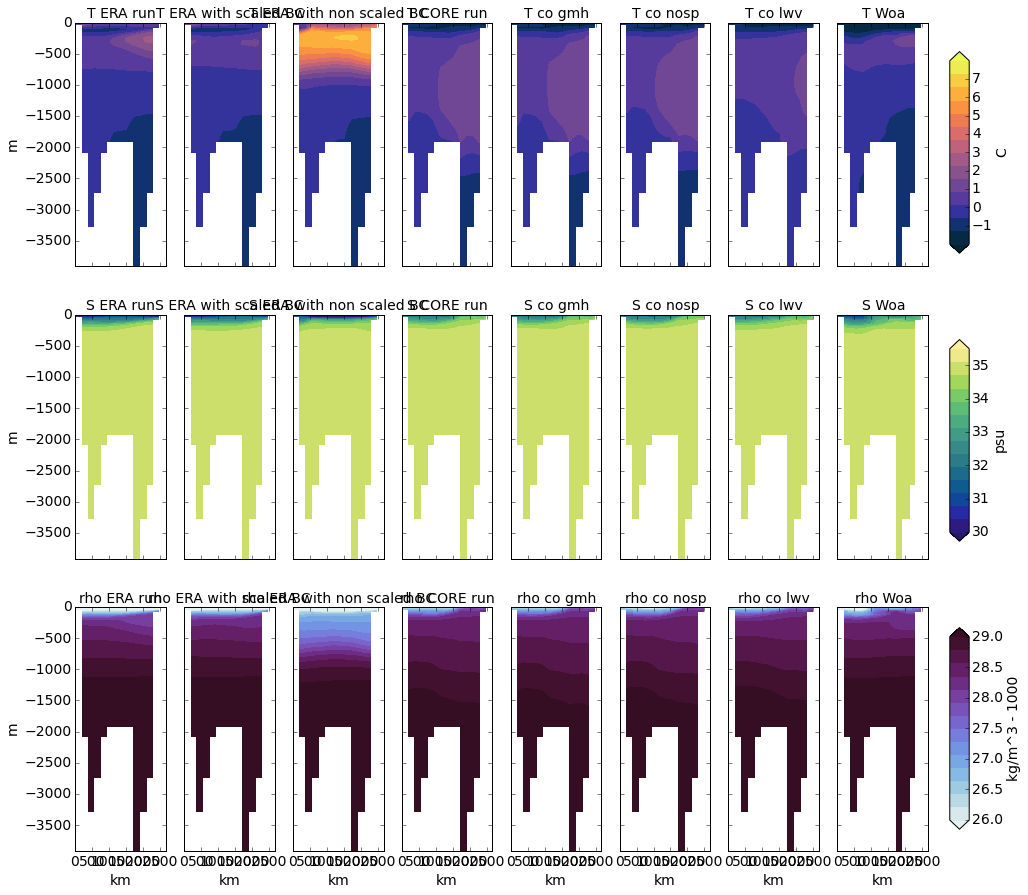

In [57]:
comp_plot(comp_data,arctic3)

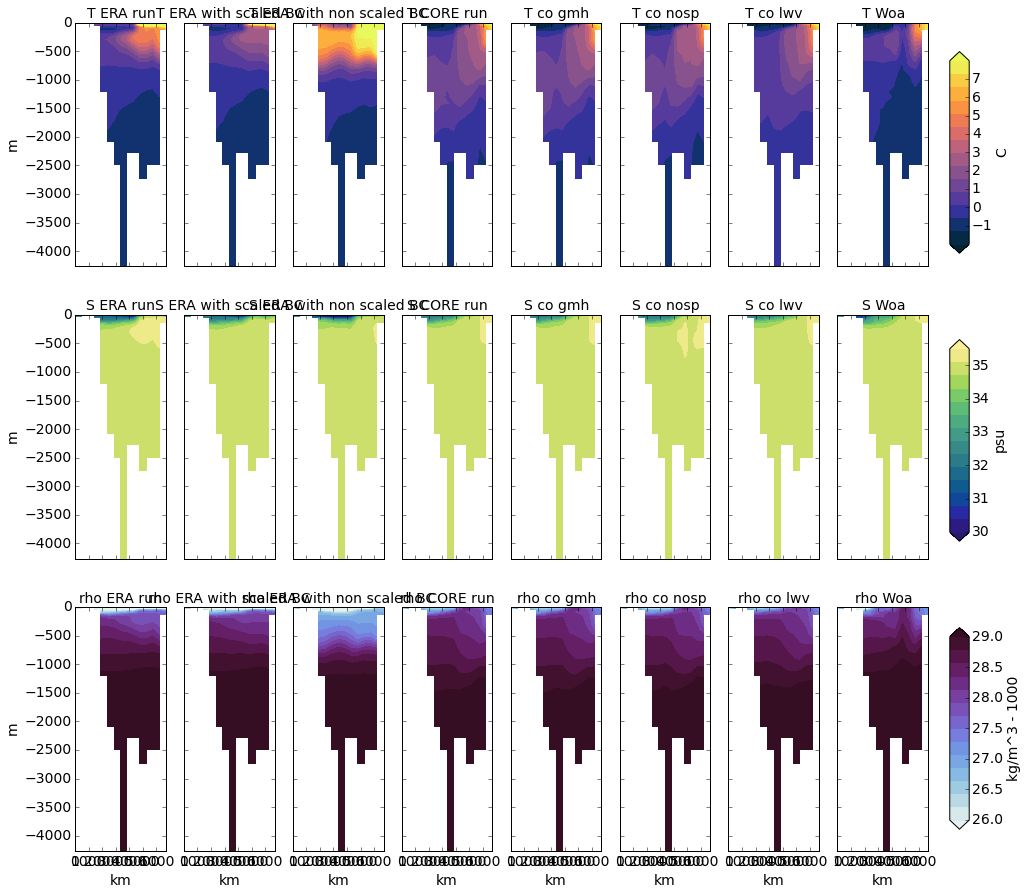

In [58]:
comp_plot(comp_data,arctic4)

Temperatures in the experiments at surface

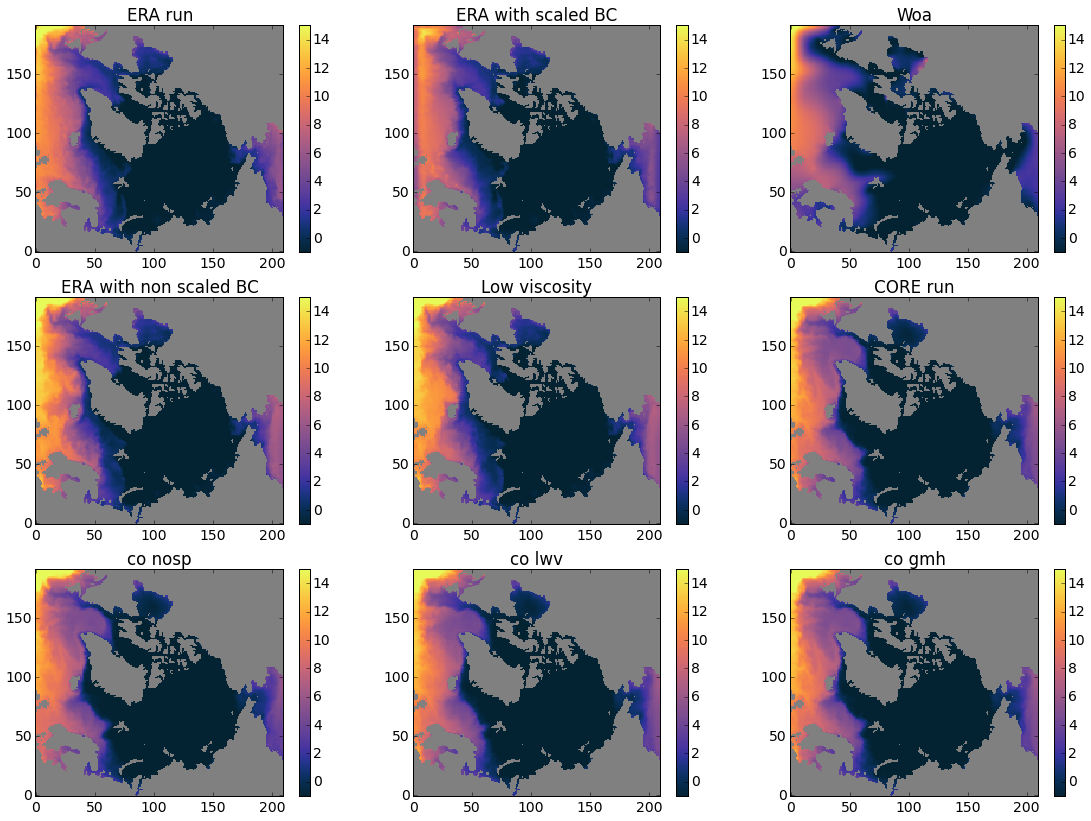

In [59]:
def plot_tot(comp):
    fig,axes = plt.subplots(3,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[0,:,:], mask=np.isnan(comp[ind].T[0,:,:]))
        cmap= cmocean.cm.temperature
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
comp = {0 : first_spinup , 1 : first_sponge ,  2 : woa ,3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_sponge , 6 : CORE_nosponge ,
             7 : CORE_lwvi, 8 : CORE_gmhalf}
plot_tot(comp)

Temperatures in the experiments at 200 m

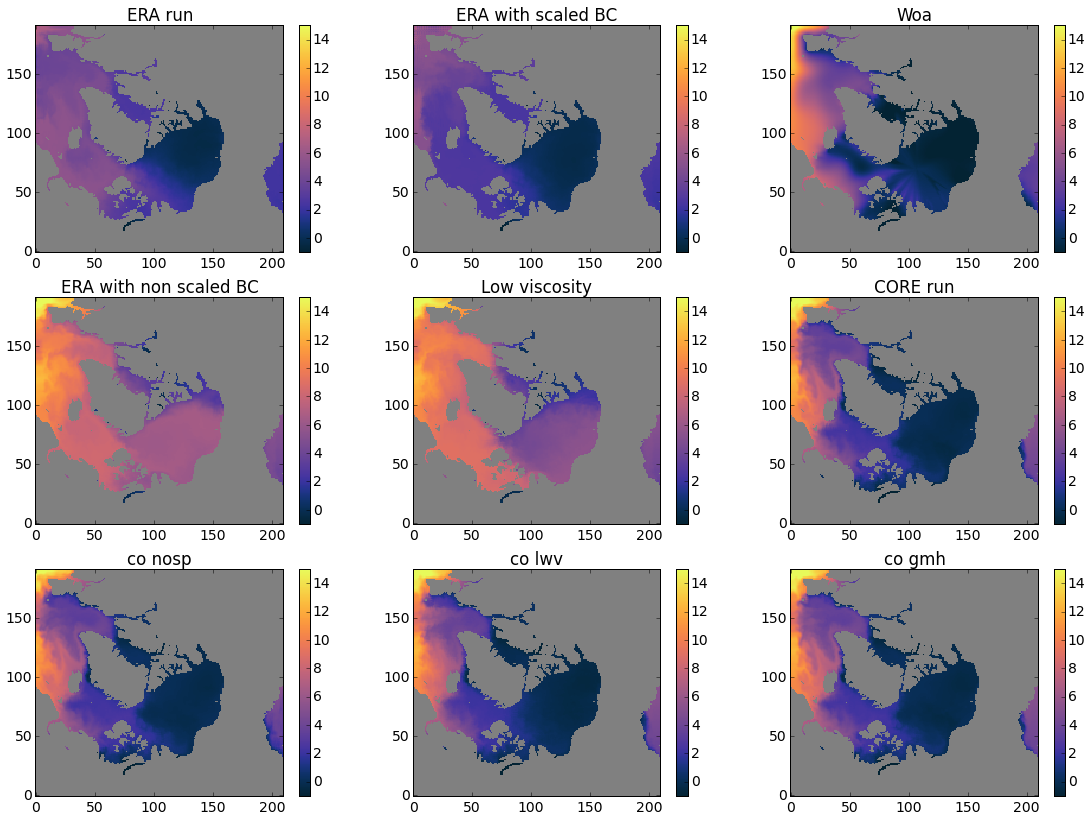

In [60]:
def plot_tot(comp):
    fig,axes = plt.subplots(3,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[16,:,:], mask=np.isnan(comp[ind].T[16,:,:]))
        cmap= cmocean.cm.temperature
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
comp = {0 : first_spinup , 1 : first_sponge ,  2 : woa ,3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_sponge , 6 : CORE_nosponge ,
             7 : CORE_lwvi, 8 : CORE_gmhalf}
plot_tot(comp)

Salinity in the experimets at surface

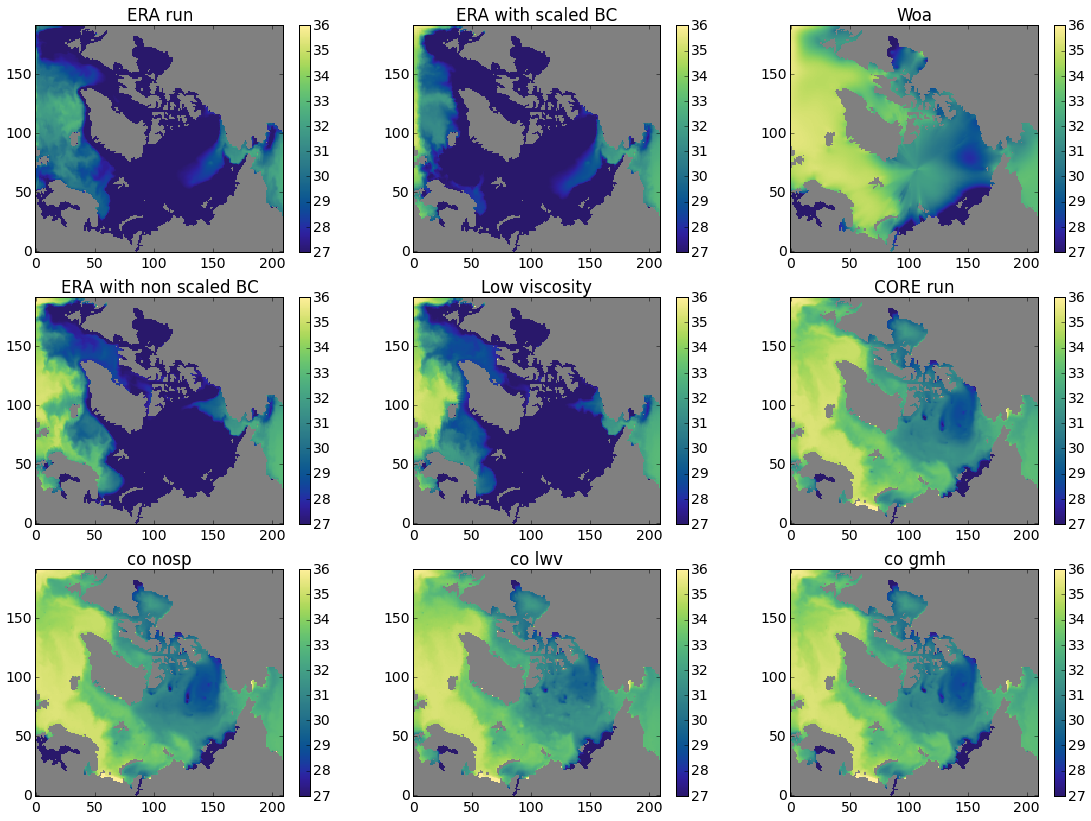

In [61]:
def plot_tot(comp):
    fig,axes = plt.subplots(3,3)
    vimin = 27
    vimax = 36
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].S[0,:,:], mask=np.isnan(comp[ind].S[0,:,:]))
        cmap= cmocean.cm.salinity
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
comp = {0 : first_spinup , 1 : first_sponge ,  2 : woa ,3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_sponge , 6 : CORE_nosponge ,
             7 : CORE_lwvi, 8 : CORE_gmhalf}
plot_tot(comp)

Seaice of experiments

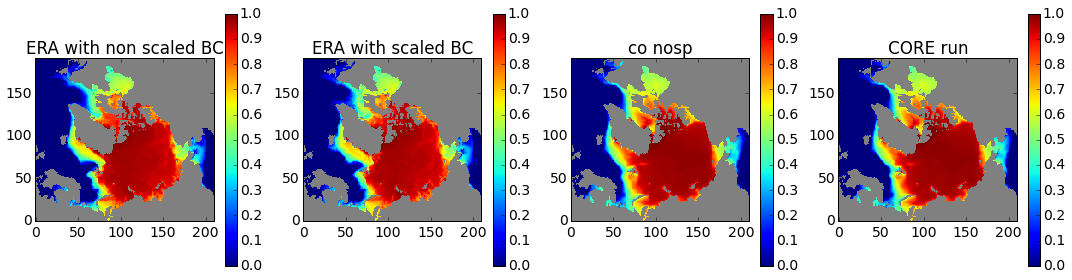

In [62]:
def plot_tot(comp):
    fig,axes = plt.subplots(1,4)
    vimin = 0
    vimax = 1
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].seaice['SIarea'][:,0,:,:],axis=0), mask=np.isnan(comp[ind].seaice['SIarea'][0,0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.5,top=1.)
comp= { 0 : nonscaled_obcs , 1 : first_sponge , 2 : CORE_nosponge , 3 : CORE_sponge}
plot_tot(comp)

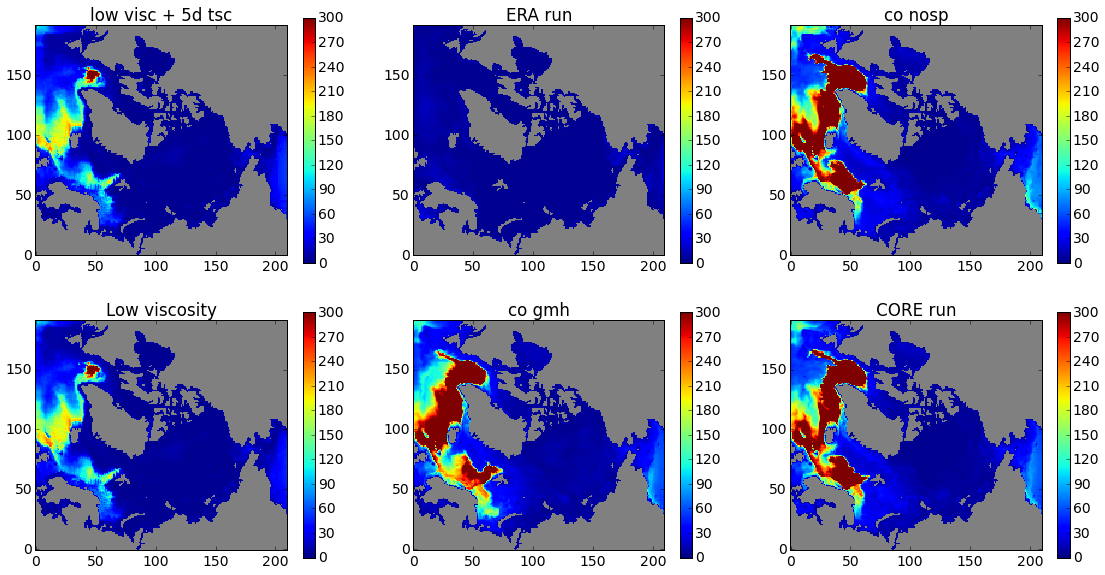

In [63]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = 0
    vimax = 300
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0), mask = np.isnan(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0)))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : short_timescale_low_visc_run , 1 : nonscaled_obcs , \
            1 : first_spinup , 2 : CORE_nosponge , 3 : low_visc_run ,
      4 : CORE_gmhalf , 5 : CORE_sponge}
plot_tot(comp)

The density ρ of each box is given by ρ = ρ0 [1 − α(T −T0) + β (S −S0)]
(13)
where ρ0 = 1027.5 kgm−3 is a reference density, T0 = 5oC is a reference temperature, α = 0.0002 oC−1 and β = 0.0008 psu−1.
The

In [64]:
run_sponge_5d = MonitorRead()
run_sponge_5d.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/',[0])
run_sponge_5d.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/',[0])
run_sponge_5d.title('sponge 5d timescale scaled obcs','brown')

run_sponge_visco = MonitorRead()
run_sponge_visco.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco.title('sponge low visco timescale','orange')

run_sponge_visco_5d = MonitorRead()
run_sponge_visco_5d.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/',[0])
run_sponge_visco_5d.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco_5d.title('sponge low visco 5d tsc','magenta')

In [65]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
run_36km.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.title('sponge 1m timescale scaled obcs','red')

run_sponge_noscaled = MonitorRead()
run_sponge_noscaled.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0,777600])
run_sponge_noscaled.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0,777600,])
run_sponge_noscaled.title('sponge 1m timescale noscaled obcs','purple')

run_sponge_timescale = MonitorRead()
run_sponge_timescale.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.title('sponge 1y timescale scaled obcs','black')

run_noice = MonitorRead()
run_noice.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0,777600])
run_noice.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0,777600])
run_noice.title('no seaice','green')

In [66]:
run_CORE_sponge = MonitorRead()
run_CORE_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/',[0,777600,1555200,2332800])
run_CORE_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/',[0,777600,1555200,2332800])
run_CORE_sponge.title('core','yellow')

run_CORE_nosponge = MonitorRead()
run_CORE_nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/',[0,777600,1555200,2332800])
run_CORE_nosponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/',[0,777600,1555200,2332800])
run_CORE_nosponge.title('core','orange')

In [67]:
run_CORE_gmhalf = MonitorRead()
run_CORE_gmhalf.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_gmhalf/results/',[0])
run_CORE_gmhalf.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/',[0])
run_CORE_gmhalf.title('core half gm','black')

run_CORE_timing = MonitorRead()
run_CORE_timing.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_timing/results/',[0])
run_CORE_timing.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_timing/results/',[0])
run_CORE_timing.title('core fixed period','blue')

run_CORE_lwvi = MonitorRead()
run_CORE_lwvi.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/',[0])
run_CORE_lwvi.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/',[0])
run_CORE_lwvi.title('core lwvisc','green')

In [68]:
run_CORE_spinup = MonitorRead()
run_CORE_spinup.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/',[0,777600,2332800,3110400,3888000,4665600,5443200,6220800,6998400,7776000,8553600])
run_CORE_spinup.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/',[0,777600,2332800,3110400,3888000,4665600,5443200,6220800,6998400,7776000,8553600])
run_CORE_spinup.title('core spinup','black')

In [69]:
run_18_nonscale = MonitorRead()
run_18_nonscale.readData('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/',[0,466560,933120])
run_18_nonscale.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/',[0,466560,933120])
run_18_nonscale.title('nonscale 18 sponge','grey')

run_18_scaled = MonitorRead()
run_18_scaled.readData('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/',[0,466560,933120])
run_18_scaled.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/',[0,466560,933120])
run_18_scaled.title('scaled 18 sponge','violet')

In [70]:
mon = { 'run_36km' : run_36km , 'run_CORE_timing' : run_CORE_timing,
       'run_sponge_visco_5d' : run_sponge_visco_5d , 'run_18_nonscale' : run_18_nonscale ,
                'run_18_scaled' : run_18_scaled, 'run_CORE_nosponge' : run_CORE_nosponge , \
       'run_CORE_sponge' : run_CORE_sponge , 'run_CORE_gmhalf' : run_CORE_gmhalf, \
       'run_CORE_lwvi' : run_CORE_lwvi, 'run_CORE_spinup' : run_CORE_spinup}


In [71]:
monpsi = { 'run_36km' : first_spinup ,  'run_18_nonscale' : nonscale_18_run , \
           'run_18_scaled' : scaled_18_run, 'run_CORE_nosponge' : CORE_nosponge, \
           'run_CORE_sponge' : CORE_sponge , 'run_CORE_gmhalf' : CORE_gmhalf,'run_CORE_lwvi' : run_CORE_lwvi}


scaled 18 sponge violet
core half gm black
nonscale 18 sponge grey
core orange
core spinup black
core fixed period blue
sponge low visco 5d tsc magenta
no sponge blue
core yellow
core lwvisc green


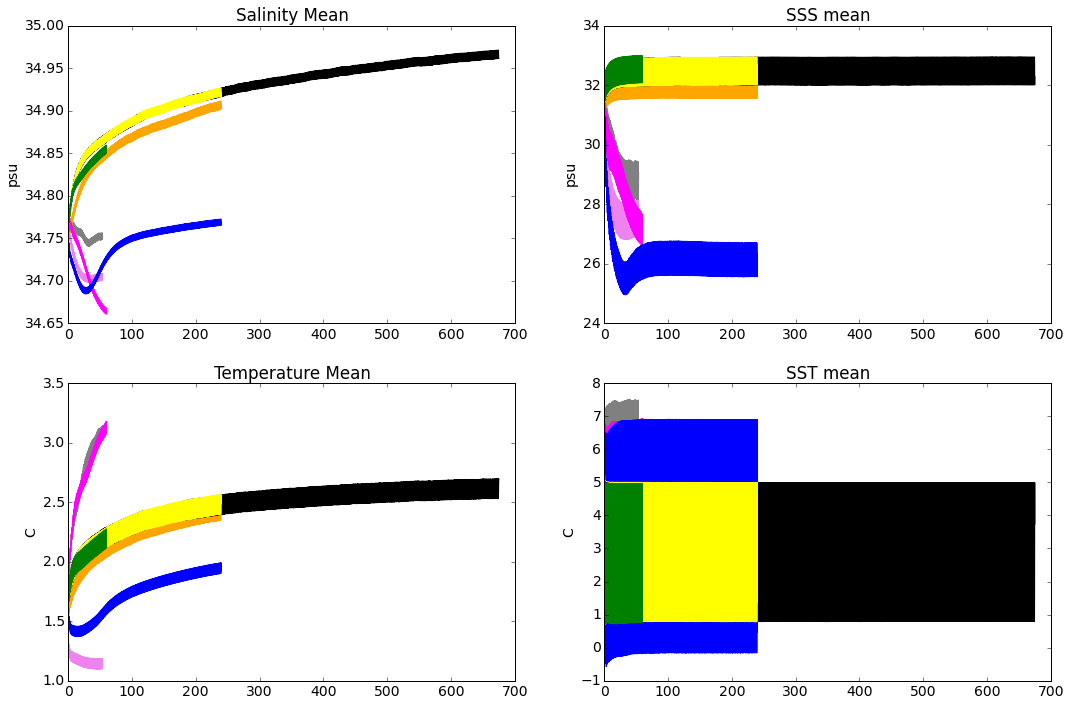

In [72]:
plot_monitor(mon,['salt_mean','sss_mean','theta_mean','sst_mean'])

scaled 18 sponge violet
core half gm black
nonscale 18 sponge grey
core orange
core spinup black
core fixed period blue
sponge low visco 5d tsc magenta
no sponge blue
core yellow
core lwvisc green


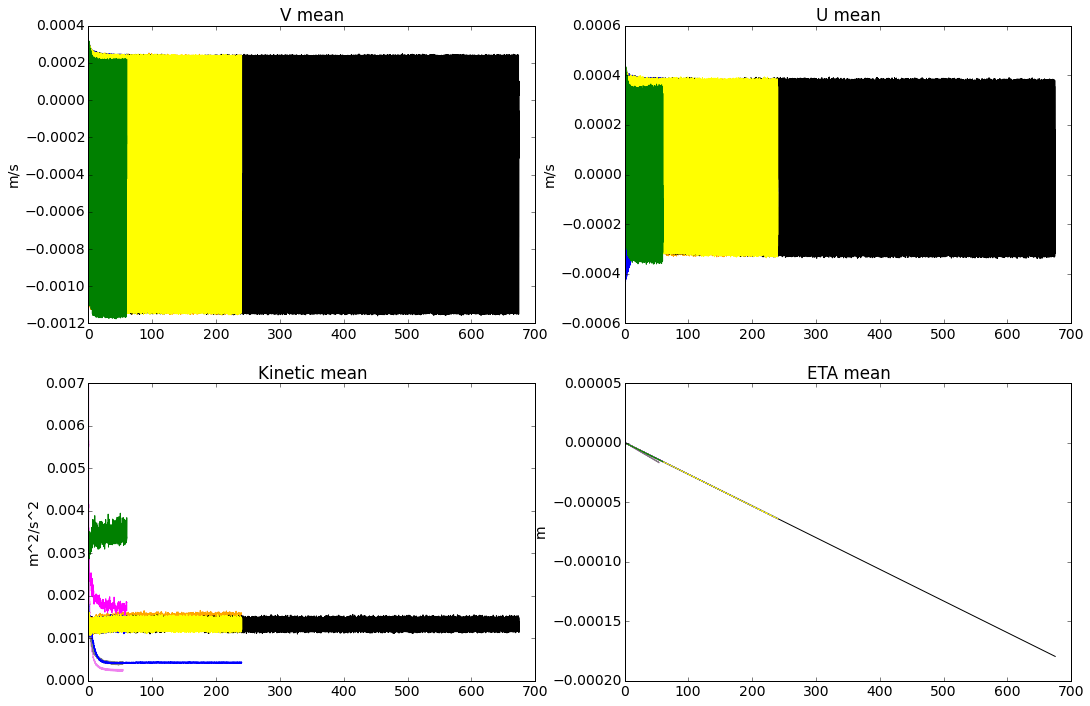

In [73]:
plot_monitor(mon,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

scaled 18 sponge violet
core half gm black
nonscale 18 sponge grey
core orange
core spinup black
core fixed period blue
sponge low visco 5d tsc magenta
no sponge blue
core yellow
core lwvisc green


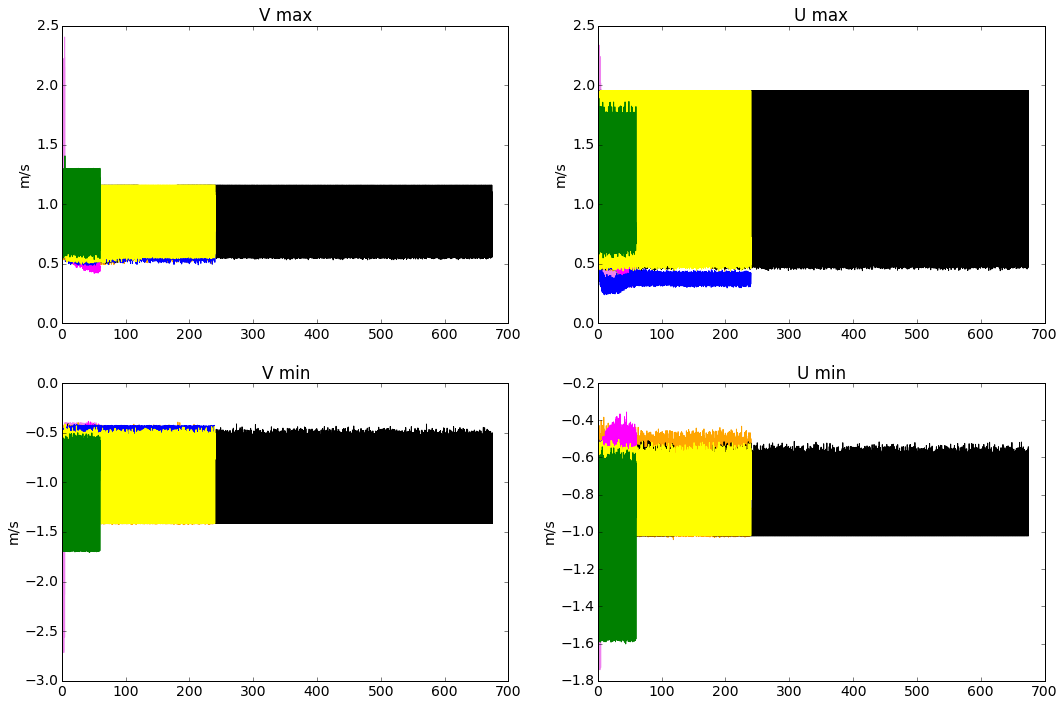

In [74]:
plot_monitor(mon,['vvel_max','uvel_max','vvel_min','uvel_min'])

scaled 18 sponge violet
core half gm black
nonscale 18 sponge grey
core orange
core spinup black
core fixed period blue
sponge low visco 5d tsc magenta
no sponge blue
core yellow
core lwvisc green


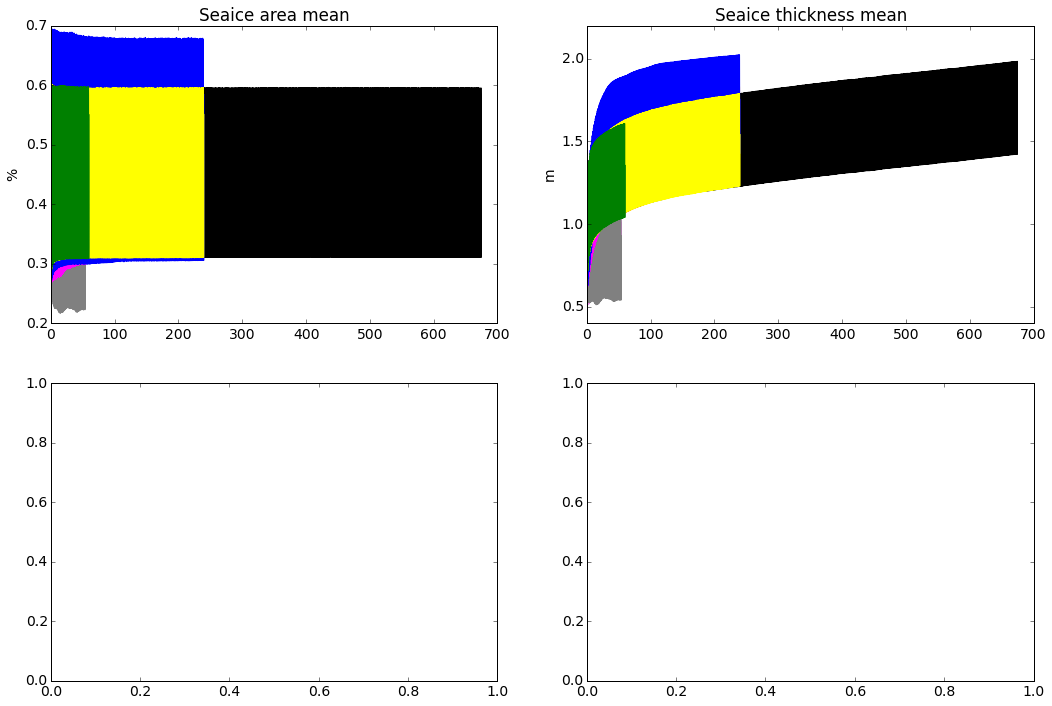

In [75]:
plot_monitor(mon,['seaice_area_mean','seaice_heff_mean'])

In [76]:
monpsi = { 'run_36km' : first_spinup ,  'run_18_nonscale' : nonscale_18_run , \
           'run_18_scaled' : scaled_18_run, 'run_CORE_nosponge' : CORE_nosponge, \
           'run_CORE_sponge' : CORE_sponge , 'run_CORE_gmhalf' : CORE_gmhalf,'run_CORE_lwvi' : CORE_lwvi}

run_18_nonscale grey
run_CORE_sponge yellow
run_36km blue
run_CORE_gmhalf black
run_CORE_nosponge orange
run_18_scaled violet
run_CORE_lwvi green


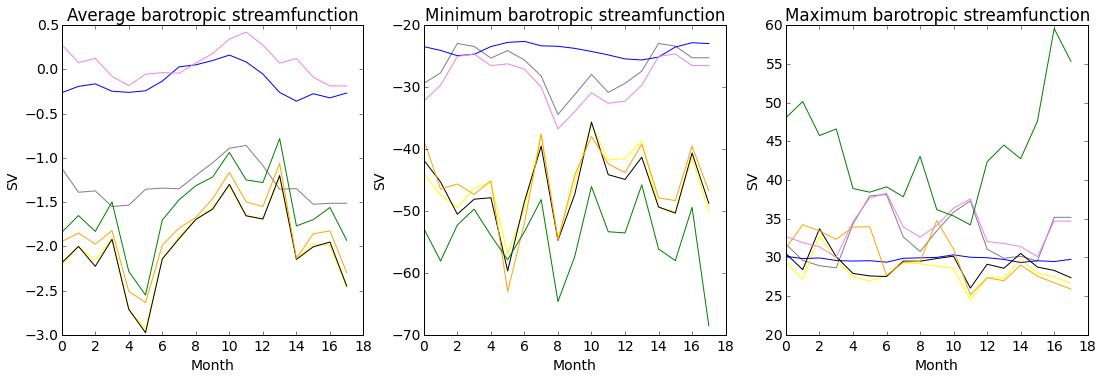

In [77]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=1,col=3):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    for mon_v in monpsi:        #print mon
        axes.flat[0].plot(monpsi[mon_v].psi_mean,mon[mon_v].color)
        axes.flat[0].set_xlabel('Month')
        axes.flat[0].set_ylabel('SV')
        axes.flat[0].set_title('Average barotropic streamfunction')
        
        axes.flat[1].plot(monpsi[mon_v].psi_min,mon[mon_v].color)
        axes.flat[1].set_xlabel('Month')
        axes.flat[1].set_ylabel('SV')
        axes.flat[1].set_title('Minimum barotropic streamfunction')
        
        axes.flat[2].plot(monpsi[mon_v].psi_max,mon[mon_v].color)
        axes.flat[2].set_xlabel('Month')
        axes.flat[2].set_ylabel('SV')
        axes.flat[2].set_title('Maximum barotropic streamfunction')
        print mon_v,mon[mon_v].color
    fig.subplots_adjust(right=2.5,top=1.2)
plot_lv(mon,'theta_lv_mean',-1,7,matplotlib.cm.jet)

In [78]:
monitor_lv1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge , 'run_sponge_noscaled' : run_sponge_noscaled , \
                 'run_sponge_visco_5d' : run_sponge_visco_5d , 'run_CORE_gmhalf' : run_CORE_gmhalf ,
                'run_18_scaled' : run_18_scaled, 'run_CORE_lwvi' : run_CORE_lwvi ,\
               'run_CORE_sponge' : run_CORE_sponge , 'woa' : woa }
titles_lv = { 'run_36km' : 'run_36km' , 'run_sponge' : 'run_sponge' , 'run_sponge_noscaled' : 'run_sponge_noscaled' , \
                 'run_sponge_visco_5d' : 'run_sponge_visco_5d ', 'run_18_nonscale' : 'run_18_nonscale' ,
                'run_18_scaled' : 'run_18_scaled', 'run_CORE_lwvi' : 'run_CORE_lwvi' , \
             'run_CORE_sponge' : 'run_CORE_sponge' , 'woa' : 'woa' , 'run_CORE_gmhalf' : 'run_CORE_gmhalf'}

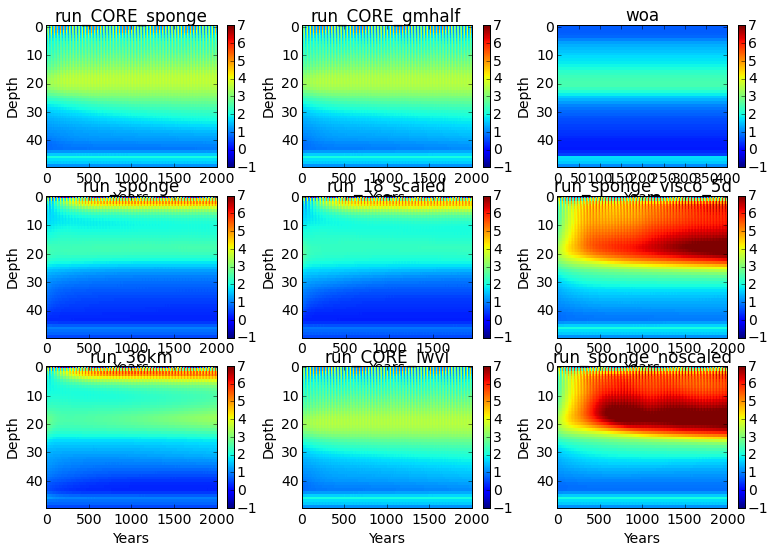

In [79]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=3,col=3):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:2000,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(titles_lv[mon])
        axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        ax_ind += 1
    fig.subplots_adjust(right=1.8,top=1.8)
plot_lv(monitor_lv1,'theta_lv_mean',-1,7,matplotlib.cm.jet)

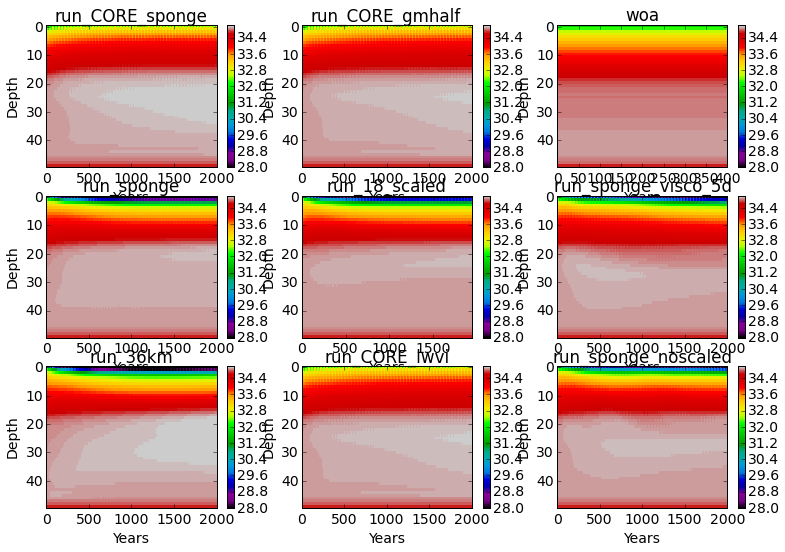

In [80]:
plot_lv(monitor_lv1,'salt_lv_mean',28,35,matplotlib.cm.nipy_spectral)

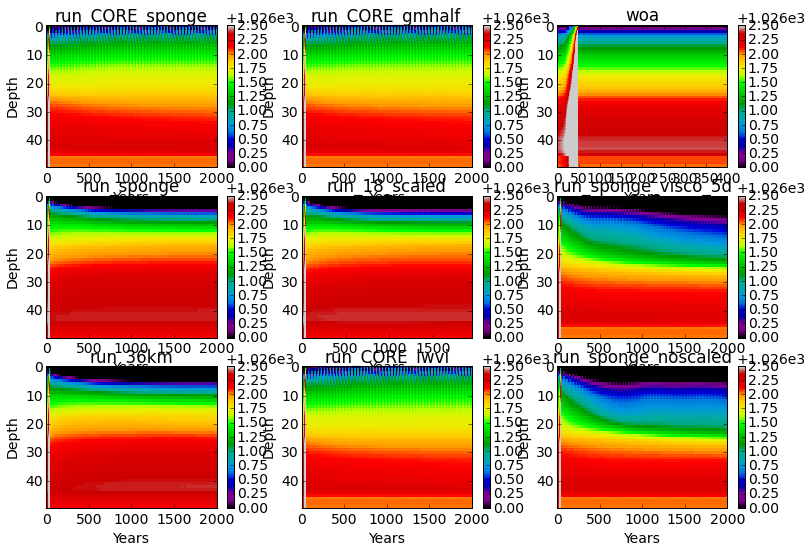

In [81]:
plot_lv(monitor_lv1,'rho_lv_mean',1026,1028.5,matplotlib.cm.nipy_spectral)

In [82]:
monitor_lv2 = {'run_36km' : run_36km , 'run_sponge' : run_sponge , 'run_sponge_noscaled' : run_sponge_noscaled , \
                 'run_sponge_visco_5d' : run_sponge_visco_5d , 'run_CORE_gmhalf' : run_CORE_gmhalf ,
                'run_18_scaled' : run_18_scaled, 'run_CORE_lwvi' : run_CORE_lwvi ,\
               'run_CORE_sponge' : run_CORE_sponge , 'run_CORE_nosponge' : run_CORE_nosponge }
titles_lv = { 'run_36km' : 'run_36km' , 'run_sponge' : 'run_sponge' , 'run_sponge_noscaled' : 'run_sponge_noscaled' , \
                 'run_sponge_visco_5d' : 'run_sponge_visco_5d ', 'run_18_nonscale' : 'run_18_nonscale' ,
                'run_18_scaled' : 'run_18_scaled', 'run_CORE_lwvi' : 'run_CORE_lwvi' , \
             'run_CORE_sponge' : 'run_CORE_sponge' , 'woa' : 'woa' , 'run_CORE_gmhalf' : 'run_CORE_gmhalf',\
             'run_CORE_nosponge' : 'run_CORE_nosponge'}

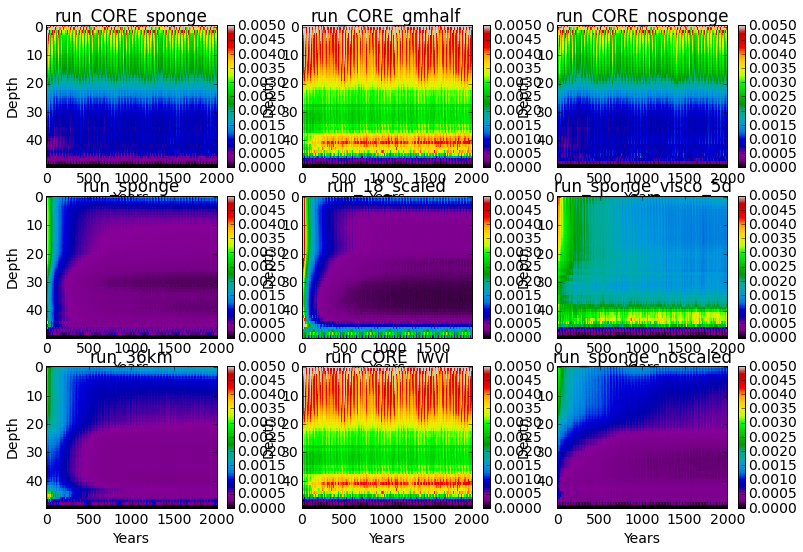

In [83]:
plot_lv(monitor_lv2,'ke_lv_mean',0,5*10**(-3),matplotlib.cm.nipy_spectral)

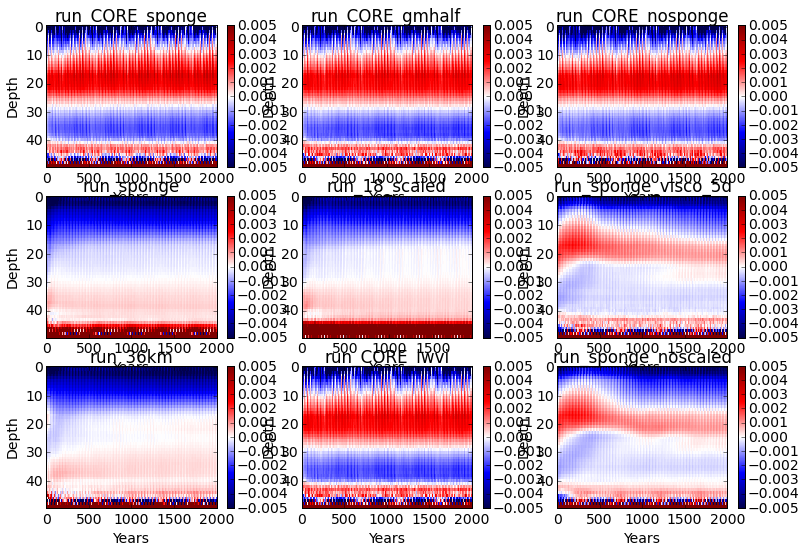

In [84]:
plot_lv(monitor_lv2,'uvel_lv_mean',-5*10**(-3),5*10**(-3),matplotlib.cm.seismic)

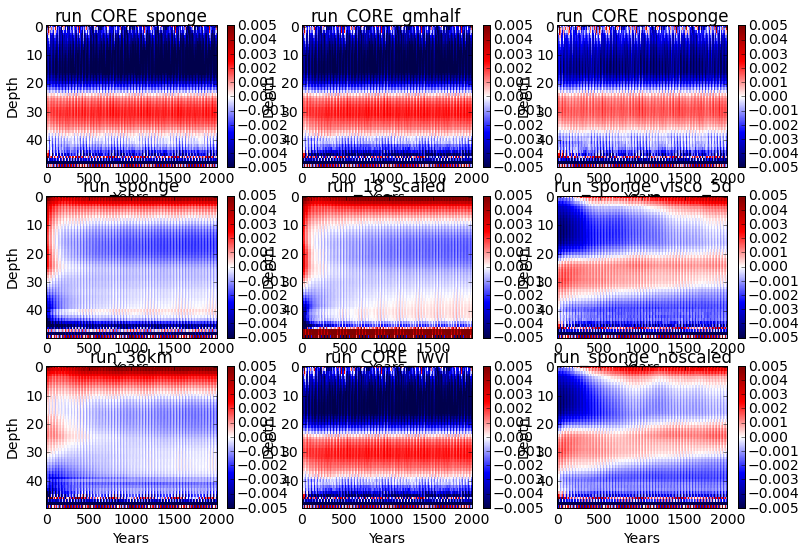

In [85]:
plot_lv(monitor_lv2,'vvel_lv_mean',-5*10**(-3),5*10**(-3),matplotlib.cm.seismic)

In [86]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/forcing/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/forcing/JRA_data/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/forcing/CORE2_data/')
titles, unity = dataset_unity()

read cube78_
Traceback (most recent call last):
  File "/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 267, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/noc/users/am8e13/anaconda/lib/python2.7/inspect.py", line 1044, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/noc/users/am8e13/anaconda/lib/python2.7/inspect.py", line 1004, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/noc/users/am8e13/anaconda/lib/python2.7/inspect.py", line 451, in getsourcefile
    if os.path.exists(filenam

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [ ]:
fig, axes = plt.subplots(4,2)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'black')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in black with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.1,top=2.4)

In [ ]:
fig, axes = plt.subplots(2,3)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in grey with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.4,top=2.1)

In [88]:
test = np.array(CORE_nosponge.T[0,:,:])
# Arctic
test[10:40,53:75] = 10000
test[40:58,68:75] = 10000
test[:,75:178] = 10000
# Norwegian Basin
test[40:100,37:68] = 20000
test[50:90,25:40] = 20000
test[58:84,68:75] = 20000
# North Atlantic
test[100:,:75] = 30000
test[50:90,:25] = 30000
test[90:100,:30] = 30000
test[hfacc[0,:,:]==0] = np.nan
plt.contourf(test[:,:])

NameError: name 'hfacc' is not defined

In [ ]:
# Calculate averages inverious areas
file2read = netcdf.NetCDFFile('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_masks/results/dynStDiag.0009331200.t001.nc','r')
# Bathy is 1 on land and 0 over sea 
theta = file2read.variables['THETA_ave']
theta = theta[:]*1
theta_lv = file2read.variables['THETA_lv_ave']
theta_lv = theta_lv[:]*1
salt = file2read.variables['SALT_ave']
salt = salt[:]*1
salt_lv = file2read.variables['SALT_lv_ave']
salt_lv = salt_lv[:]*1

In [ ]:
reg = { 0 : 'global' , 1 : 'Arctic' , 2 : 'Norw Bas' , 3 : 'North Atl' }

In [ ]:
def plot_lv(row=2,col=4):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for ax_ind in range(4):
        #print mon
        ca = axes.flat[ax_ind].imshow(theta_lv[:,ax_ind].T,vmin = -1, vmax = 8,\
                    interpolation='nearest', cmap = matplotlib.cm.Accent ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title('T ' + reg[ax_ind])
        #axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        
        ca = axes.flat[ax_ind+4].imshow(salt_lv[:,ax_ind].T,vmin = 33, vmax = 36,\
                    interpolation='nearest', cmap = matplotlib.cm.Accent ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind+4], )
        axes.flat[ax_ind+4].set_title('S ' + reg[ax_ind])
        axes.flat[ax_ind+4].set_xlabel('Years')
        axes.flat[ax_ind+4].set_ylabel('Depth')
        
    fig.subplots_adjust(right=2.4,top=1.8)

plot_lv()